<a href="https://colab.research.google.com/github/wkdwlgus/ktcloud_genai/blob/main/%EC%83%9D%EC%84%B1%EB%AA%A8%EB%8D%B8_%ED%8C%8C%EC%9D%B8%ED%8A%9C%EB%8B%9D_K_pop%EA%B0%80%EC%82%AC%EB%A7%8C%EB%93%A4%EA%B8%B0_%EC%9E%A5%EC%A7%80%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-PopÍ∞ÄÏÇ¨ ÏÉùÏÑ±Î™®Îç∏ ÎßåÎì§Í∏∞(ÎØ∏ÏÑ∏ÌäúÎãù)**


- **Î™©Ìëú**
    - ÌïúÍµ≠Ïñ¥Î•º ÏûòÌïòÎäî Í≤ΩÎüâÌôî Î™®Îç∏(Ïòà: KoGPT2 ÎòêÎäî Polyglot-Ko 5.8B Îì±)ÏùÑ Í∞ÄÏ†∏ÏôÄ,  
    - K-pop Í∞ÄÏÇ¨ Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú Ï∂îÍ∞Ä ÌïôÏäµ(**Fine-tuning**)ÏãúÏºú
    - **K-PopÍ∞ÄÏÇ¨ ÏÉùÏÑ±Î™®Îç∏ ÎßåÎì§Í∏∞**
- **Îç∞Ïù¥ÌÑ∞ÏÖã**
    - **EX3exp / Kpop-lyric-datasets** (GitHub)
    - https://github.com/EX3exp/Kpop-lyric-datasets



---



In [ ]:
%%capture
!pip install transformers accelerate tokenizers datasets safetensors



---



## **ÎèÑÎ©îÏù∏ ÌäπÌôî ÌååÏù∏ÌäúÎãù Ïòà**

### **ÏòàÏ†ú : K-pop Í∞ÄÏÇ¨ Ïä§ÌÉÄÏùº ÏÉùÏÑ±Í∏∞**
- - Îç∞Ïù¥ÌÑ∞ Ï∂îÍ∞ÄÌï¥ÏÑú ÎØ∏ÏÑ∏ÌäúÎãùÌïòÎäî ÏûëÏóÖÏùò ÌïÑÏöîÏÑ± ÌôïÏù∏ÌïòÍ∏∞

In [ ]:
# ========================================
# K-pop Í∞ÄÏÇ¨ Ïä§ÌÉÄÏùº ÏÉùÏÑ±Í∏∞
# (Í∏∞Ï°¥ Î™®Îç∏ÏùÑ K-pop Í∞ÄÏÇ¨Î°ú Í∞ÑÎã®Ìûà ÌååÏù∏ÌäúÎãùÌïòÎäî ÏòàÏ†ú)
# ========================================

print("="*70)
print("üéµ K-pop Í∞ÄÏÇ¨ ÏÉùÏÑ±Í∏∞ - ÌååÏù∏ÌäúÎãù ÏòàÏ†ú")
print("="*70)

import os, torch
from datasets import Dataset
from transformers import (
    AutoTokenizer, GPT2LMHeadModel  # Trainer/TrainingArgumentsÎäî Ï°∞Í±¥Î∂Ä ÏûÑÌè¨Ìä∏
)

DO_TRAIN = False  # üîÅ Ïã§Ï†ú ÌïôÏäµÌïòÎ†§Î©¥ TrueÎ°ú Î≥ÄÍ≤Ω

# 1) Îç∞Ïù¥ÌÑ∞
kpop_lyrics = [
    "ÎÑå ÎÇòÏùò ÎπõÏù¥Ïïº Ïñ¥Îë† ÏÜçÏóêÏÑúÎèÑ ÎπõÎÇòÎäî Î≥ÑÏ≤òÎüº",
    "Ïö∞Î¶¨Ïùò ÍøàÏùÑ Ìñ•Ìï¥ Ìï®Íªò ÎÇ†ÏïÑÍ∞ÄÏûê ÎÜíÏù¥ Îçî ÎÜíÏù¥",
    "ÏÇ¨ÎûëÌï¥ ÏÇ¨ÎûëÌï¥ Ïù¥ ÎßàÏùå Ï†ÑÌï¥ÏßàÍπå",
    "Î∞òÏßùÏù¥Îäî Î¨¥ÎåÄ ÏúÑ Ïö∞Î¶¨Îäî ÌïòÎÇòÍ∞Ä Îèº",
    "Don't stop the music Í≥ÑÏÜç Ï∂§Ï∂∞Î¥ê",
    "You're my star ÎÇ¥ ÌïòÎäòÏùò Ïú†ÏùºÌïú Îπõ",
    "Ìï®ÍªòÎùºÎ©¥ ÎëêÎ†µÏßÄ ÏïäÏïÑ Let's go",
    "ÎπõÎÇòÎäî Ïö∞Î¶¨Ïùò ÏàúÍ∞Ñ Forever young",
    "ÏÜêÏùÑ Ïû°Í≥† Ìï®Íªò Í∞ÄÏûê ÎÅùÍπåÏßÄ",
    "Dreams come true ÎØøÏñ¥Î¥ê Ïö∞Î¶¨Ïùò ÎØ∏Îûò",
]
dataset = Dataset.from_dict({"text": kpop_lyrics})
print(f"‚úÖ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ± ÏôÑÎ£å: {len(dataset)} ÏÉòÌîå")

# 2) Î™®Îç∏/ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä
model_name = "skt/kogpt2-base-v2"
print(f"\nüì• Î≤†Ïù¥Ïä§ Î™®Îç∏ Î°úÎìú: {model_name}")
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# pad/eos ÏÑ∏ÌåÖ
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token
model.config.pad_token_id = tokenizer.pad_token_id
# (Ïã†Í∑ú ÌÜ†ÌÅ∞ Ï∂îÍ∞ÄÏãú) model.resize_token_embeddings(len(tokenizer))

# 3) ÌÜ†ÌÅ∞Ìôî
def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, max_length=128, padding="max_length")
print("\nüîÑ Îç∞Ïù¥ÌÑ∞ ÌÜ†ÌÅ∞Ìôî Ï§ë...")
tokenized_dataset = dataset.map(tokenize_function, batched=True, remove_columns=["text"])
print("‚úÖ ÌÜ†ÌÅ∞Ìôî ÏôÑÎ£å")

# 4) (ÏòµÏÖò) ÌïôÏäµ
if DO_TRAIN:
    print("\nüéì ÌååÏù∏ÌäúÎãù ÏãúÏûë")
    from transformers import DataCollatorForLanguageModeling, Trainer, TrainingArguments
    data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

    training_args = TrainingArguments(
        output_dir="./kpop-gpt2",
        num_train_epochs=1,
        per_device_train_batch_size=2,
        learning_rate=5e-5,
        weight_decay=0.01,
        logging_steps=5,
        save_steps=10,
        save_total_limit=2,
        push_to_hub=False,
        report_to=[],
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_dataset,
        data_collator=data_collator,
    )
    trainer.train()
    trainer.save_model("./kpop-gpt2")

# 5) ÏÉùÏÑ± Îç∞Î™® (ÌïôÏäµ Ï†Ñ/ÌõÑ ÎèôÏùºÌïòÍ≤å ÏÇ¨Ïö© Í∞ÄÎä•)
print("\n" + "="*70)
print("üé§ K-pop Ïä§ÌÉÄÏùº Í∞ÄÏÇ¨ ÏÉùÏÑ± (Î≤†Ïù¥Ïä§/ÌòπÏùÄ ÌååÏù∏ÌäúÎãù Î™®Îç∏)")
print("="*70)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
model.eval()

generation_prompts = ["ÏÇ¨ÎûëÌï¥", "Ìï®Íªò", "ÍøàÏùÑ"]
for i, prompt in enumerate(generation_prompts, 1):
    print(f"\n„Äê ÏÉùÏÑ± {i} „Äë ÏãúÏûë Îã®Ïñ¥: {prompt}")
    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=50,
            temperature=0.9,
            top_p=0.95,
            do_sample=True,
            pad_token_id=tokenizer.eos_token_id,
        )
    print(tokenizer.decode(outputs[0], skip_special_tokens=True))
    print("-"*70)


print("\nüí° Ïã§Ï†ú ÌååÏù∏ÌäúÎãù:")
print("   1. Îçî ÎßéÏùÄ K-pop Í∞ÄÏÇ¨ Îç∞Ïù¥ÌÑ∞ ÏàòÏßë (1000+ Í≥°)")
print("   2. ÏúÑ TrainingArgumentsÎ°ú ÌïôÏäµ Ïã§Ìñâ")
print("   3. ÌååÏù∏ÌäúÎãùÎêú Î™®Îç∏Î°ú Îçî ÎÇòÏùÄ Í≤∞Í≥º ÏÉùÏÑ±")
print("   4. Hugging Face HubÏóê ÏóÖÎ°úÎìúÌïòÏó¨ Í≥µÏú†")

üéµ K-pop Í∞ÄÏÇ¨ ÏÉùÏÑ±Í∏∞ - ÌååÏù∏ÌäúÎãù ÏòàÏ†ú
‚úÖ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ± ÏôÑÎ£å: 10 ÏÉòÌîå

üì• Î≤†Ïù¥Ïä§ Î™®Îç∏ Î°úÎìú: skt/kogpt2-base-v2


config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/513M [00:00<?, ?B/s]


üîÑ Îç∞Ïù¥ÌÑ∞ ÌÜ†ÌÅ∞Ìôî Ï§ë...


Map:   0%|          | 0/10 [00:00<?, ? examples/s]

‚úÖ ÌÜ†ÌÅ∞Ìôî ÏôÑÎ£å

üé§ K-pop Ïä§ÌÉÄÏùº Í∞ÄÏÇ¨ ÏÉùÏÑ± (Î≤†Ïù¥Ïä§/ÌòπÏùÄ ÌååÏù∏ÌäúÎãù Î™®Îç∏)

„Äê ÏÉùÏÑ± 1 „Äë ÏãúÏûë Îã®Ïñ¥: ÏÇ¨ÎûëÌï¥


model.safetensors:   0%|          | 0.00/513M [00:00<?, ?B/s]

Exception in thread Thread-auto_conversion:
Traceback (most recent call last):
  File "/usr/lib/python3.12/threading.py", line 1075, in _bootstrap_inner


KeyboardInterrupt: 



---



## **K-pop Í∞ÄÏÇ¨ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ïù¥Ïö©Ìïú ÎØ∏ÏÑ∏ÌäúÎãù**

### **1Îã®Í≥Ñ: ÍπÉÌóàÎ∏åÏóêÏÑú K-pop Í∞ÄÏÇ¨ Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú Î∞è Ï†ÑÏ≤òÎ¶¨**

In [ ]:
# Í∏∞Ï°¥Ïóê ÏûàÎçò Ìè¥ÎçîÍ∞ïÏ†ú  ÏÇ≠Ï†úÌïòÍ∏∞
!rm -rf /content/Kpop-lyric-datasets

In [ ]:
# 1. ÍπÉÌóàÎ∏å Ï†ÄÏû•ÏÜå Î≥µÏ†ú (Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú)
!git clone https://github.com/EX3exp/Kpop-lyric-datasets.git

# 2. ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò
# datasets: ÌóàÍπÖÌéòÏù¥Ïä§Ïùò Îç∞Ïù¥ÌÑ∞ÏÖã ÎùºÏù¥Î∏åÎü¨Î¶¨
# transformers: Î™®Îç∏ Î∞è ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä ÎùºÏù¥Î∏åÎü¨Î¶¨
# accelerate: ÌïôÏäµ Í∞ÄÏÜçÌôî
!pip install datasets transformers accelerate

Cloning into 'Kpop-lyric-datasets'...
remote: Enumerating objects: 26227, done.
remote: Counting objects: 100% (26227/26227), done.
remote: Compressing objects: 100% (25585/25585), done.
remote: Total 26227 (delta 656), reused 26196 (delta 639), pack-reused 0 (from 0)
Receiving objects: 100% (26227/26227), 24.97 MiB | 11.93 MiB/s, done.
Resolving deltas: 100% (656/656), done.
Updating files: 100% (25885/25885), done.


- **(ÌïÑÌÑ∞ÎßÅ Ï∂îÍ∞Ä) 2020ÎÖÑ Ïù¥ÌõÑ Îç∞Ïù¥ÌÑ∞ÏÖãÎßå Ï∂îÏ∂úÌïòÍ∏∞**
    - Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÌïòÎ©¥ ÏãúÍ∞ÑÏù¥ Ïò§Îûò Í±∏Î¶∞Îã§.(A100 40Î∂Ñ Ïù¥ÏÉÅ)

In [ ]:
import os
import json # .json ÌååÏùºÏùÑ ÌååÏã±(parsing)ÌïòÍ∏∞ ÏúÑÌï¥ ÎÇ¥Ïû• ÎùºÏù¥Î∏åÎü¨Î¶¨ import
from glob import glob
import re   # Ï†ïÍ∑úÌëúÌòÑÏãù ÎùºÏù¥Î∏åÎü¨Î¶¨ Ï∂îÍ∞Ä

# 3. Ï†ïÌôïÌïú JSON ÌååÏùº Í≤ΩÎ°ú ÌÉêÏÉâ
data_path = "Kpop-lyric-datasets/melon/monthly-chart"
search_pattern = os.path.join(data_path, "*", "*", "*.json")
all_json_files = glob(search_pattern)

print(f"Î∞úÍ≤¨Îêú Ï¥ù JSON ÌååÏùº Í∞úÏàò: {len(all_json_files)}Í∞ú")

if not all_json_files:
    print("!!! Ïò§Î•ò: JSON ÌååÏùºÏùÑ Ï∞æÏßÄ Î™ªÌñàÏäµÎãàÎã§. git cloneÏù¥ ÏÑ±Í≥µÌñàÎäîÏßÄ, Í≤ΩÎ°úÍ∞Ä Ïò¨Î∞îÎ•∏ÏßÄ ÌôïÏù∏ÌïòÏÑ∏Ïöî.")


# 4. JSON ÌååÏùºÏùÑ 'Îã®Ïùº ÎîïÏÖîÎÑàÎ¶¨'Î°ú Í∞ÑÏ£ºÌïòÍ≥† Í∞ÄÏÇ¨ Ï∂îÏ∂ú
train_file_path = "kpop_lyrics_train.txt"
total_lyrics_count = 0
processed_files_count = 0 # (Ï∂îÍ∞Ä) 2020ÎÖÑ Ïù¥ÌõÑ Ï≤òÎ¶¨Îêú ÌååÏùº Ïπ¥Ïö¥Ìä∏

# ÌååÏùº Í≤ΩÎ°úÏóêÏÑú Ïó∞ÎèÑÎ•º Ï∂îÏ∂úÌïòÍ∏∞ ÏúÑÌïú Ï†ïÍ∑úÌëúÌòÑÏãù Ïª¥ÌååÏùº
# 'melon-' Îí§Ïóê ÎÇòÏò§Îäî 4ÏûêÎ¶¨ Ïà´Ïûê(\d{4})Î•º Ï∞æÏäµÎãàÎã§.
year_pattern = re.compile(r'melon-(\d{4})')

with open(train_file_path, "w", encoding="utf-8") as train_file:
    for file_path in all_json_files: # Í∞Å JSON ÌååÏùºÏùÑ ÏàúÌöå

        # --- Ïó∞ÎèÑ ÌïÑÌÑ∞ÎßÅ Î°úÏßÅ ---
        year_match = year_pattern.search(file_path)

        if not year_match:
            # 'melon-YYYY' Ìå®ÌÑ¥Ïù¥ ÌååÏùº Í≤ΩÎ°úÏóê ÏóÜÏúºÎ©¥ Í±¥ÎÑàÎúÅÎãàÎã§.
            continue

        # Ï†ïÍ∑úÌëúÌòÑÏãùÏúºÎ°ú Ï∞æÏùÄ Ïó∞ÎèÑ(Î¨∏ÏûêÏó¥)Î•º Ï†ïÏàò(int)Î°ú Î≥ÄÌôò
        year = int(year_match.group(1))

        # 2020ÎÖÑ ÎØ∏Îßå Îç∞Ïù¥ÌÑ∞Îäî Í±¥ÎÑàÎúÅÎãàÎã§.
        if year < 2020:
            continue
        # --------------------------------

        # (2020ÎÖÑ Ïù¥ÏÉÅÏù∏ ÌååÏùºÎßå Ï≤òÎ¶¨)
        processed_files_count += 1

        try:
            with open(file_path, "r", encoding="utf-8") as f:
                # JSON ÌååÏùº 1Í∞úÎ•º ÎîïÏÖîÎÑàÎ¶¨(song_data)Î°ú Î∞îÎ°ú Î°úÎìúÌï©ÎãàÎã§.
                song_data = json.load(f)

                # 1. 'lyrics' Í∞ùÏ≤¥Î•º song_dataÏóêÏÑú ÏßÅÏ†ë Í∞ÄÏ†∏ÏòµÎãàÎã§.
                lyrics_object = song_data.get("lyrics")

                # 2. lyrics_objectÍ∞Ä Ï°¥Ïû¨ÌïòÍ≥†, ÎîïÏÖîÎÑàÎ¶¨ ÌòïÌÉúÏùº Í≤ΩÏö∞ÏóêÎßå 'lines' Î¶¨Ïä§Ìä∏Î•º Ï∞æÏäµÎãàÎã§.
                if lyrics_object and isinstance(lyrics_object, dict):
                    lines_list = lyrics_object.get("lines")

                    # 3. lines_listÍ∞Ä Ï°¥Ïû¨ÌïòÍ≥†, Î¶¨Ïä§Ìä∏ ÌòïÌÉúÏùº Í≤ΩÏö∞ÏóêÎßå Í∞ÄÏÇ¨Î•º Ìï©Ïπ©ÎãàÎã§.
                    if lines_list and isinstance(lines_list, list):
                        full_lyrics = "\n".join(lines_list).strip()

                        if full_lyrics:
                            train_file.write(full_lyrics + "\n\n<|endoftext|>\n\n")
                            total_lyrics_count += 1

        except json.JSONDecodeError:
            print(f"JSON ÌååÏã± Ïò§Î•ò: {file_path} (ÌååÏùºÏù¥ ÏÜêÏÉÅÎêòÏóàÏùÑ Ïàò ÏûàÏäµÎãàÎã§)")
        except AttributeError as e: # 'str' object has no attribute 'get' Ïò§Î•ò Î∞úÏÉù Ïãú
             print(f"!!! Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ Ïò§Î•ò ({file_path}): {e}. JSON ÌååÏùºÏù¥ ÏòàÏÉÅÍ≥º Îã§Î•∏ Íµ¨Ï°∞Ïùº Ïàò ÏûàÏäµÎãàÎã§.")
        except Exception as e:
            print(f"ÌååÏùº Ï≤òÎ¶¨ Ï§ë Ïïå Ïàò ÏóÜÎäî Ïò§Î•ò ({file_path}): {e}")

print(f"'{train_file_path}' ÌååÏùº ÏÉùÏÑ± ÏôÑÎ£å!")
print(f"--- (ÌïÑÌÑ∞ÎßÅ Ï†ÅÏö©) 2020ÎÖÑ Ïù¥ÌõÑ Îç∞Ïù¥ÌÑ∞Îßå Ï≤òÎ¶¨ ---")
print(f"Ï≤òÎ¶¨Îêú ÌååÏùº Í∞úÏàò: {processed_files_count}Í∞ú (Ï†ÑÏ≤¥: {len(all_json_files)}Í∞ú Ï§ë)")
print(f"Ï¥ù {total_lyrics_count}Í∞úÏùò Í∞ÄÏÇ¨Î•º ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï∂îÏ∂úÌïòÏó¨ ÌååÏùºÏóê Ï†ÄÏû•ÌñàÏäµÎãàÎã§.")


Î∞úÍ≤¨Îêú Ï¥ù JSON ÌååÏùº Í∞úÏàò: 25876Í∞ú
'kpop_lyrics_train.txt' ÌååÏùº ÏÉùÏÑ± ÏôÑÎ£å!
--- (ÌïÑÌÑ∞ÎßÅ Ï†ÅÏö©) 2020ÎÖÑ Ïù¥ÌõÑ Îç∞Ïù¥ÌÑ∞Îßå Ï≤òÎ¶¨ ---
Ï≤òÎ¶¨Îêú ÌååÏùº Í∞úÏàò: 4500Í∞ú (Ï†ÑÏ≤¥: 25876Í∞ú Ï§ë)
Ï¥ù 4490Í∞úÏùò Í∞ÄÏÇ¨Î•º ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï∂îÏ∂úÌïòÏó¨ ÌååÏùºÏóê Ï†ÄÏû•ÌñàÏäµÎãàÎã§.


### **2Îã®Í≥Ñ: K-pop Í∞ÄÏÇ¨ Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú KoGPT2 Î™®Îç∏ ÌååÏù∏ÌäúÎãù**

In [ ]:
import torch
from transformers import (
    AutoTokenizer,
    AutoModelForCausalLM,
    TextDataset,
    DataCollatorForLanguageModeling,
    Trainer,
    TrainingArguments
)

# 1. ÌååÏù∏ÌäúÎãùÌï† Í∏∞Î∞ò Î™®Îç∏ Î∞è ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä ÏÑ†ÌÉù
BASE_MODEL = "skt/KoGPT2-base-v2"

tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL,
    bos_token='<s>', # Î¨∏Ïû• ÏãúÏûë
    eos_token='</s>', # Î¨∏Ïû• ÎÅù
    unk_token='<unk>',
    pad_token='<pad>',
    mask_token='<mask>')

model = AutoModelForCausalLM.from_pretrained(BASE_MODEL)
model.resize_token_embeddings(len(tokenizer)) # ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÏóê ÎßûÍ≤å Î™®Îç∏ ÏûÑÎ≤†Îî© ÌÅ¨Í∏∞ Ï°∞Ï†à

# 2. ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú
# Ïö∞Î¶¨Í∞Ä 1Îã®Í≥ÑÏóêÏÑú ÎßåÎì† kpop_lyrics_train.txt ÌååÏùºÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
train_dataset = TextDataset(
    tokenizer=tokenizer,
    file_path=train_file_path,  # kpop_lyrics_train.txt
    block_size=128              # Î©îÎ™®Î¶¨Ïóê ÎßûÍ≤å Î∏îÎ°ù ÌÅ¨Í∏∞ Ï°∞Ï†à (128~256)
)

# 3. Îç∞Ïù¥ÌÑ∞ ÏΩúÎ†àÏù¥ÌÑ∞ ÏÑ§Ï†ï (Î∞∞Ïπò ÏÉùÏÑ±)
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False  # Masked Language Model (BERT)Í∞Ä ÏïÑÎãå Causal LM (GPT) Î∞©Ïãù
)

# 4. ÌïôÏäµ ÏÑ§Ï†ï (TrainingArguments)
# ÌååÏù∏ÌäúÎãùÎêú Î™®Îç∏Ïù¥ Ï†ÄÏû•Îê† Í≤ΩÎ°ú
output_dir = "./kpop-kogpt2-finetuned"

training_args = TrainingArguments(
    output_dir=output_dir,
    overwrite_output_dir=True,
    num_train_epochs=3,     # ÏóêÌè¨ÌÅ¨ Ïàò (3~5 Ï†ïÎèÑÍ∞Ä Ï†ÅÎãπ)
    per_device_train_batch_size=4,  # Colab T4 Î©îÎ™®Î¶¨Ïóê ÎßûÍ≤å Î∞∞Ïπò ÌÅ¨Í∏∞ (4 ÎòêÎäî 8)
    save_steps=10_000,      # (ÏòàÏ†úÎùº Ï†ÄÏû• Ïä§ÌÖùÏùÄ ÌÅ¨Í≤å Ïû°Ïùå)
    save_total_limit=2,
    logging_steps=100,      # 100 Ïä§ÌÖùÎßàÎã§ Î°úÍ∑∏ Ï∂úÎ†•
    fp16=True, # T4 GPUÏóêÏÑú ÌïôÏäµ ÏÜçÎèÑ Ìñ•ÏÉÅÏùÑ ÏúÑÌï¥ 16ÎπÑÌä∏ ÏÇ¨Ïö©
)

# 5. Ìä∏Î†àÏù¥ÎÑà(Trainer) ÏÉùÏÑ± Î∞è ÌïôÏäµ ÏãúÏûë
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
)

print("=== K-pop Í∞ÄÏÇ¨ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ ÌååÏù∏ÌäúÎãùÏùÑ ÏãúÏûëÌï©ÎãàÎã§ ===")
trainer.train()
print("=== ÌååÏù∏ÌäúÎãù ÏôÑÎ£å! ===")

# 6. ÌïôÏäµÎêú Î™®Îç∏ Ï†ÄÏû•
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

print(f"ÌååÏù∏ÌäúÎãùÎêú K-pop Î™®Îç∏Ïù¥ '{output_dir}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

# ÌååÏù∏ÌäúÎãùÎêú K-pop Î™®Îç∏Ïù¥ './kpop-kogpt2-finetuned'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.

config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/513M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the ü§ó Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


=== K-pop Í∞ÄÏÇ¨ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ ÌååÏù∏ÌäúÎãùÏùÑ ÏãúÏûëÌï©ÎãàÎã§ ===


/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: a47339177 (a47339177-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


`loss_type=None` was set in the config but it is unrecognized. Using the default loss: `ForCausalLMLoss`.


=== ÌååÏù∏ÌäúÎãù ÏôÑÎ£å! ===
ÌååÏù∏ÌäúÎãùÎêú K-pop Î™®Îç∏Ïù¥ './kpop-kogpt2-finetuned'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


### **3Îã®Í≥Ñ: ÌååÏù∏ÌäúÎãùÎêú Î™®Îç∏Î°ú K-pop Í∞ÄÏÇ¨ ÏÉùÏÑ±ÌïòÍ∏∞**

In [ ]:
from transformers import pipeline

# 1. Ïö∞Î¶¨Í∞Ä 2Îã®Í≥ÑÏóêÏÑú ÌååÏù∏ÌäúÎãùÌïú Î™®Îç∏ Î°úÎìú
# BASE_MODELÏù¥ ÏïÑÎãå, Ïö∞Î¶¨Í∞Ä Ï†ÄÏû•Ìïú output_dir Í≤ΩÎ°úÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
finetuned_model_path = "./kpop-kogpt2-finetuned"

# 'text-generation' ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ ÏâΩÍ≤å ÌÖçÏä§Ìä∏Î•º ÏÉùÏÑ±Ìï† Ïàò ÏûàÏäµÎãàÎã§.
# device=0ÏùÄ GPUÎ•º ÏÇ¨Ïö©ÌïòÍ≤†Îã§Îäî ÏùòÎØ∏ÏûÖÎãàÎã§. (CPUÎäî -1)
generator = pipeline(
    'text-generation',
    model=finetuned_model_path,
    tokenizer=finetuned_model_path,
    device=0 if torch.cuda.is_available() else -1
)

# 2. Í∞ÄÏÇ¨ ÏÉùÏÑ± ÌÖåÏä§Ìä∏
# ÏÉùÏÑ±Ìï† Í∞ÄÏÇ¨Ïùò ÏãúÏûë ÌîÑÎ°¨ÌîÑÌä∏(Seed text)Î•º Ï†úÍ≥µÌï©ÎãàÎã§.
# Ïù¥ ÌîÑÎ°¨ÌîÑÌä∏Ïóê Ïù¥Ïñ¥ÏßÄÎäî Í∞ÄÏÇ¨Î•º Î™®Îç∏Ïù¥ ÏÉùÏÑ±Ìï©ÎãàÎã§.
seed_text = "Ï∞®Í∞ÄÏö¥ Î∞îÎûåÏù¥ Î∂àÏñ¥ÏôÄ"
# seed_text = "Ïò§Îäò Î∞§ ÎÑàÏôÄ ÎÇò"
# seed_text = "Ïù¥ ÎπÑÌä∏Í∞Ä ÎÇ† ÎØ∏ÏπòÍ≤å Ìï¥"
# seed_text = "Ï†Ä Ïö∞Ï£º ÎÅùÍπåÏßÄ ÌïòÏù¥Ìçº Ïä§ÌéòÏù¥Ïä§"
# seed_text = "ÎÑ§Í∞Ä ÎßåÎì† Ïø†ÌÇ§ ÎßõÏù¥ Ïñ¥Îïå"
# seed_text = "Oh baby, You're so fine"
# seed_text = "Oh baby, ÎÑå ÎÑàÎ¨¥ Î©ãÏ†∏"


# 3. Í∞ÄÏÇ¨ ÏÉùÏÑ± ÏòµÏÖò ÏÑ§Ï†ï
# num_return_sequences: Î™á Í∞úÏùò Îã§Î•∏ Î≤ÑÏ†Ñ Í∞ÄÏÇ¨Î•º ÏÉùÏÑ±Ìï†ÏßÄ
# max_length: ÏÉùÏÑ±Îê† Í∞ÄÏÇ¨Ïùò ÏµúÎåÄ Í∏∏Ïù¥ (ÌîÑÎ°¨ÌîÑÌä∏ Ìè¨Ìï®)
# do_sample=True: Îã§ÏñëÌïú Í∞ÄÏÇ¨Î•º ÏÉùÏÑ± (True Í∂åÏû•)
# top_k, top_p: ÏÉùÏÑ±Îê† Îã®Ïñ¥Ïùò Îã§ÏñëÏÑ± Ï°∞Ï†à (k=50, p=0.95Í∞Ä ÏùºÎ∞òÏ†Å)
# no_repeat_ngram_size: ÌäπÏ†ï n-gram(Ïòà: 2Îã®Ïñ¥)Ïù¥ Î∞òÎ≥µÎêòÏßÄ ÏïäÎèÑÎ°ù ÌïòÏó¨ "ÏÇ¨ÎûëÌï¥ ÏÇ¨ÎûëÌï¥ ÏÇ¨ÎûëÌï¥" Í∞ôÏùÄ Î∞òÎ≥µ Î∞©ÏßÄ
generated_lyrics = generator(
    seed_text,
    num_return_sequences=3, # 3Í∞ÄÏßÄ Î≤ÑÏ†ÑÏùò Í∞ÄÏÇ¨ ÏÉùÏÑ±
    max_length=100,         # ÏµúÎåÄ 100 ÌÜ†ÌÅ∞ Í∏∏Ïù¥
    do_sample=True,
    top_k=50,
    top_p=0.95,
    no_repeat_ngram_size=2,
    early_stopping=True
)

print(f"--- ÌîÑÎ°¨ÌîÑÌä∏: '{seed_text}' ---")
for i, result in enumerate(generated_lyrics):
    print(f"\n[ÏÉùÏÑ± Í∞ÄÏÇ¨ {i+1}]")
    print(result['generated_text'])

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


--- ÌîÑÎ°¨ÌîÑÌä∏: 'Ï∞®Í∞ÄÏö¥ Î∞îÎûåÏù¥ Î∂àÏñ¥ÏôÄ' ---

[ÏÉùÏÑ± Í∞ÄÏÇ¨ 1]
Ï∞®Í∞ÄÏö¥ Î∞îÎûåÏù¥ Î∂àÏñ¥ÏôÄ
Í∑∏ÎåÄÎ•º ÏïàÍ≥† Ïñ¥ÎîîÎì† Í∞àÍ≤å
Ïù¥Ï†ú ÎÇòÎßå ÎØøÏñ¥Ïöî
ÎÇòÏùò ÎßàÏßÄÎßâ Ï£ºÏù∏Í≥µÏù¥ ÎêòÏñ¥
Îã§Ïã† ÎàÑÍµ¨ ÏïûÏóêÏÑúÎèÑ
But we were born to be alone
Come on ÎòêÎã§Ïãú ÏãúÏûëÌï¥
Yeah where you want?
Comfort me to take my arms and go
ÎààÏùÑ Í∞êÏïÑ Î©àÏ∂∞ÏûàÎçò ÎÇòÎ•º Íπ®Ïõå
ÎÇ¥ ÏïàÏùò ÎÇòÎ•º Ï≤úÏ≤úÌûà ÏïàÏïÑÏ£ºÎ©¥
Ïó¨Îü¨ ÏÉâÍπîÎì§Î°ú Îçî ÎÇ¥Í∞Ä ÎπõÎÇ† ÎïåÎ©¥
Îß§Ïùº Í∑∏Î†§ÏôîÎçò ÏßÑÏßú ÎÇ¥ Î™®Ïäµ Í∞ÄÍπåÏù¥
ÏßÄÍ∏àÏù¥ÎùºÍ≥†
Fiesta ÎÇ¥ ÎßòÏóê ÌÉúÏñëÏùÑ Íæπ ÏÇºÌÇ® Ï±Ñ
ÏòÅÏõêÌÜ†Î°ù Îú®Í≤ÅÍ≤å ÏßÄÏßÄ ÏïäÏùÑÍ≤å Îß§Ïùº
Îú®Í≤ÅÍ≤å ÏÇ¨ÎûëÌï†Í≤å ÏÇ¨ÎûëÌï¥Ïöî
Ïù¥ Î™®Îì† Í≥ÑÏ†à
ÎÇòÏùò Î™®Îì† ÎÇ†Îì§Í≥º
Î≥ÑÎπõÏóê ÎÇòÎ•º ÎçòÏ†∏
Ìïú Î≤àÏØ§ÏùÄ Íº≠ ÎÜÄÎü¨ ÏôÄÏ§òÏöî
Îß§Ïùº Î∞§
Ïò® ÏÑ∏ÏÉÅ Î™®Îì† ÏàúÍ∞Ñ Ìï®ÍªòÌï¥
Ï†ÄÍ∏∞ Î∞§ÌïòÎäò Î≥ÑÎπõ ÏÜçÏóê ÎÇ¥Í∞Ä Î≥¥Ïó¨Ï§ò
Ìï†Îûò
It's makesis ma fimma margarit

we ain move it now
ÌïòÎäòÏóê Î≥ÑÎì§ÎèÑ ÎÇ† ÎπÑÏ∂∞Ï§ò ÎÇ¥ Í≥ÅÏóêÏÑú I'ma fly
Maka ha hear hand I w

[ÏÉùÏÑ± Í∞ÄÏÇ

### **[Ïã§Ïäµ] Îã§ÏñëÌïú Ï†úÏãúÎ¨∏Ïû•ÏúºÎ°ú Í∞ÄÏÇ¨ ÏÉùÏÑ± ÌÖåÏä§Ìä∏ÌïòÍ∏∞**

ÏΩîÎìúÏùò #2. Í∞ÄÏÇ¨ ÏÉùÏÑ± ÌÖåÏä§Ìä∏ Î∂ÄÎ∂ÑÏóêÏÑú Ï†úÏãúÌïú **Ï†úÏãúÎ¨∏Ïû•**ÏùÑ Îã§ÏñëÌïòÍ≤å ÏûÖÎ†•Ìï¥Î≥¥Í≥† Í∞ÄÏÇ¨ ÏÉùÏÑ± Í≤∞Í≥ºÎ•º ÌôïÏù∏Ìï¥ Î≥¥ÏÑ∏Ïöî.

In [ ]:
seed_text = "Í∂ÅÍ∏àÌà¨ÏÑ±Ïù¥Ïùò ÎÑà ÍººÏßùÎßàÎùº ÎÑà"
# seed_text = "ÌôçÎåÄÏûÖÍµ¨ Í∞ÄÎ†§Î©¥ Ïñ¥ÎîîÎ°ú Í∞ÄÏïºÌïòÏò§ ÏïÑÏ†ÄÏî®"

generated_lyrics = generator(
    seed_text,
    num_return_sequences=10, # 10Í∞ÄÏßÄ Î≤ÑÏ†ÑÏùò Í∞ÄÏÇ¨ ÏÉùÏÑ±
    max_length=30,         # ÏµúÎåÄ 30 ÌÜ†ÌÅ∞ Í∏∏Ïù¥
    do_sample=True,
    top_k=50,
    top_p=0.95,
    no_repeat_ngram_size=2,
    early_stopping=True
)

print(f"--- ÌîÑÎ°¨ÌîÑÌä∏: '{seed_text}' ---")
for i, result in enumerate(generated_lyrics):
    print(f"\n[ÏÉùÏÑ± Í∞ÄÏÇ¨ {i+1}]")
    print(result['generated_text'])



Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


--- ÌîÑÎ°¨ÌîÑÌä∏: 'Í∂ÅÍ∏àÌà¨ÏÑ±Ïù¥Ïùò ÎÑà ÍººÏßùÎßàÎùº ÎÑà' ---

[ÏÉùÏÑ± Í∞ÄÏÇ¨ 1]
Í∂ÅÍ∏àÌà¨ÏÑ±Ïù¥Ïùò ÎÑà ÍººÏßùÎßàÎùº ÎÑàÎäî ÎÇò ÏóÜÏù¥ÎèÑ Ïûò ÏÇ¥ÏïÑ
My life's shining like a VVS VvS
ÎÇ¥ ÏÇ∂ÏùÄ ÎπõÎÇò V VSVVA
Î≥¥ÎûÄ ÎìØ ÎÇòÏôÄ TVÏóê
Now you see me babe
ÎÇ¥Í∞Ä TVÎ•º Î¥§Îçò Í±¥
ÏÇ¥Ïù¥ Îπ†Ï°åÎã§Í≥† ÎßêÌïòÎäî Í±¥ ÏïÑÎãàÏïº
Í∑∏Îüº Îßê Îã§ÌñàÏßÄ Î≠ê

Hey na na, nah
ÎÇòÏùò Î∞§ÏùÄ Ï¢Ä Îçî Í∏∏Í≥† Ïô∏Î°≠ÏßÄÎßå
ÌïòÎ£®Ï¢ÖÏùº Îñ†Ïò§Î•¥Îäî ÎÑàÏùò ÏñºÍµ¥ÏùÄ
Î∞©ÏùÑ Í∞ÄÎìù Ï±ÑÏõå Î¨¥ÏßÄÍ∞úÍ∞ôÏù¥
Îã¨ÏΩ§Ìïú ÏÉâÍ∞êÏù¥ Î¨ºÎì§Ïñ¥ Ï°∞Í∏àÏî©
Ï†ïÏã†ÏùÑ Ï∞®Î†∏ÏùÑ Îïê ÏïåÏïÑÎ≥º ÏàòÎèÑ ÏóÜÏßÄ
Í∞ÄÎìù Ï∞¨ ÎßàÏùåÏù¥ Ïó¨Î¨ºÎã§ Î™ªÌï¥
ÌÑ∞ÏßÄÍ≥† ÏûàÏñ¥
ÌÑ∞Îäî Ï†àÎåÄ Ïïà Ï≥ê
ÏÇ¨ÎûëÏùÄ ÏßÄÎÇ†ÏàòÎ°ù ÎçîÏö± ÏÑ†Î™ÖÌïòÍ≤å ÎÇ®ÏïÑ
Ïö∞Î¶¨Ïùò Í∞êÏ†ïÏù¥ Î™®ÏûêÎùºÏÑú Î¨¥ÎÑàÏ†∏Í∞Ä
Ïó¨Í∏∞ ÏßÄÌïòÎ∞©ÏùÄ ÎÑàÎ¨¥ Ïñ¥ÎëêÏõå
Îã§Ïãú ÎèåÏïÑÏôÄ
For every day
I knight
Í±∞ÏßìÎßêÌïòÎ©¥ Ïïà Îèº
Ïù¥ÎùºÍ≥† ÎÇ¥Í≤å ÎßêÌï¥Ï§ò
Ï≤òÏùåÏúºÎ°ú ÎÇ¥ ÏÜêÏùÑ Ïû°ÏïÑÏ§ÑÍ≤å
Ïù¥Ï†úÎ∞ú ÎÇ¥Í∞Ä Ìï†Í≤å Íº≠
ÎÑ§Í∞Ä Ìï† Ïàò ÏûàÏùÑÍπå
We gooh
ÎÑàÎ•º ÏÇ¨ÎûëÌïúÎã§Í≥†
comin

In [ ]:
# seed_text = "Í∂ÅÍ∏àÌà¨ÏÑ±Ïù¥Ïùò ÎÑà ÍººÏßùÎßàÎùº ÎÑà"
seed_text = "ÌôçÎåÄÏûÖÍµ¨ Í∞ÄÎ†§Î©¥ Ïñ¥ÎîîÎ°ú Í∞ÄÏïºÌïòÏò§ ÏïÑÏ†ÄÏî®"

generated_lyrics = generator(
    seed_text,
    num_return_sequences=10, # 10Í∞ÄÏßÄ Î≤ÑÏ†ÑÏùò Í∞ÄÏÇ¨ ÏÉùÏÑ±
    max_length=30,         # ÏµúÎåÄ 30 ÌÜ†ÌÅ∞ Í∏∏Ïù¥
    do_sample=True,
    top_k=50,
    top_p=0.95,
    no_repeat_ngram_size=2,
    early_stopping=True
)

print(f"--- ÌîÑÎ°¨ÌîÑÌä∏: '{seed_text}' ---")
for i, result in enumerate(generated_lyrics):
    print(f"\n[ÏÉùÏÑ± Í∞ÄÏÇ¨ {i+1}]")
    print(result['generated_text'])



Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


--- ÌîÑÎ°¨ÌîÑÌä∏: 'ÌôçÎåÄÏûÖÍµ¨ Í∞ÄÎ†§Î©¥ Ïñ¥ÎîîÎ°ú Í∞ÄÏïºÌïòÏò§ ÏïÑÏ†ÄÏî®' ---

[ÏÉùÏÑ± Í∞ÄÏÇ¨ 1]
ÌôçÎåÄÏûÖÍµ¨ Í∞ÄÎ†§Î©¥ Ïñ¥ÎîîÎ°ú Í∞ÄÏïºÌïòÏò§ ÏïÑÏ†ÄÏî®
Ï†ÄÍ∏∞ Î¨ºÎßàÎ£®Ïóê ÏûàÏñ¥Î≥¥Î©¥ Îèº Ï†êÏÑ†ÏùÑ Îî∞Îùº

Ïñ¥Îäê Ïñ∏Îçï ÎÇòÎ¨¥Ï≤òÎüº
ÎÑàÏùò Í∏∞ÏñµÏùÄ ÎÇ¥Í≤å
Ïâ¨ÏóàÎã§Í∞ÄÎäî Í∑∏ÎäòÏù¥ÏóàÍ≥†
ÎßàÏ£º ÎãøÏúºÎ©¥
Ïì∞ÎùºÎ¶¨Îäî ÏÉÅÏ≤ò Í∞ôÏùÄ Ïù¥Î¶Ñ
ÎñºÏñ¥ÎÇº ÏàòÎèÑ ÏóÜÎäî
Îñ®Ïñ¥ÏßÄÏßÄ ÏïäÎäî Îî±ÏßÄ Í∞ôÏïÑ
ÎàÑÍµ∞Í∞Ä ÎÇòÏóêÍ≤å Î¨ºÏñ¥Î≥¥Î©¥ Ìï≠ÏÉÅ
Í∞ôÏùÄ ÎåÄÎãµ ÎÇ¥ Í∞ÄÏû• Ï¢ãÏïòÎçò ÎÇ†
Îäò ÌòºÏûê ÎÑ§Í≤å Ìï¥Ï§Ä Í±∏
ÌòºÏûêÏÑú Ï¢ãÏïòÏñ¥
Ïù¥Ï†† ÎÇ®Ïù¥ ÎêòÎäî Í≤å ÎÇú Ïã´ÏùÄÎç∞
ÎÇò ÌòºÏûê Ïö∏ÏßÄÎßà
ÌòπÏãú Îì£Í≤å ÎêòÎ©¥ ÏïÑÏßÅ ÎÑàÎøêÏù¥ÎùºÍ≥†
ÎÇ¥Í≤ê
Ïö∞Î¶¨ ÏñòÍ∏∞ Î™ª Ìï† Í≤É Í∞ôÏïÑ ÏïÑÏßÅ
Í∏∞Îã§Î†∏Ïñ¥ ÎÑàÎèÑ ÎÇ† Í∏∞Îã§Î¶¥ Í±∞ÎùºÍ≥†
ÎßêÌïòÏßÄ Î™ªÌñàÏñ¥ ÏïÑÏßÅÎèÑ
ÎÇ¥ ÏñòÍ∏∞Î•º Í∏∞Îã§Î¶¨Îäî Ï§ë
ÏßÄÍ∏àÎèÑ ÎßéÏù¥ Î≥¥Í≥† Ïã∂Ïñ¥
Ïò§ÎäòÎèÑ ÎÇ¥Ïùº ÎßéÏù¥ Î∞îÏÅòÏßÄ ÏïäÏúºÎ©¥
ÎÑ§ ÏÉùÍ∞ÅÏóê
ÌïòÎ£® Ï¢ÖÏùº Î®∏Î¶øÏÜçÏùÑ ÌïòÏñóÍ≤å ÌùòÎü¨Í∞Ä
ÎÅùÎÇòÏßàÍπå Î¥ê
ÎÑàÏóêÍ≤å Î≤ÑÌÖ®Î≥¥Î†§ Ìï¥
ÏÉùÍ∞ÅÌï¥Î¥êÎèÑ
ÌïòÎ£®Ï¢ÖÏùº
Ïï†Ïç

## **[ÎØ∏ÏÖò] Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏàòÏßëÌïòÍ≥† Ï†ÑÏ≤òÎ¶¨ÌïòÏó¨ Î™®Îç∏ÏùÑ 2Ï∞® ÌäúÎãùÌïòÍ∏∞**
ÏïûÏóêÏÑú ÌäúÎãùÎêú Î™®Îç∏Ïóê ÏÉàÎ°≠Í≤å ÏàòÏßëÎêú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÎÑ£Ïñ¥ÏÑú 2Ï∞® ÌäúÎãù(Í∏∞Ï°¥ Í∞ÄÏÇ¨ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÌïÑÌÑ∞Ï°∞Í±¥ Ï∂îÍ∞Ä) Î™®Îç∏ÏùÑ ÎßåÎì§Ïñ¥ Î≥¥ÏÑ∏Ïöî.

[ÎØ∏ÏÖò] Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏàòÏßëÌïòÍ≥† Ï†ÑÏ≤òÎ¶¨ÌïòÏó¨ Î™®Îç∏ÏùÑ ÌäúÎãùÌïòÍ∏∞

[ÌïÑÏàò] ÏïûÏóêÏÑú ÌäúÎãùÎêú Î™®Îç∏Ïóê ÏÉàÎ°≠Í≤å ÏàòÏßëÎêú K-pop Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÎÑ£Ïñ¥ÏÑú 2Ï∞® ÌäúÎãù(Í∏∞Ï°¥ Í∞ÄÏÇ¨ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÌïÑÌÑ∞Ï°∞Í±¥ Ï∂îÍ∞Ä) Ìï¥ÏÑú Î™®Îç∏ Ï†ÄÏû•ÌïòÍ∏∞

[ÏÑ†ÌÉù] Î≤†Ïù¥Ïä§ Î™®Îç∏ÏùÑ 2Í∞ú Ïù¥ÏÉÅ ÏÑ†Ï†ïÌïòÏó¨ 1Î≤à Î™®Îç∏Ïóê ÎåÄÌïú ÌèâÍ∞ÄÏßÄÌëúÎ•º ÏÑ†Ï†ïÌïòÏó¨ ÎπÑÍµêÌïòÍ∏∞(ÏãúÍ∞ÅÌôîÌïòÎ©¥ Îçî Ï¢ãÏïÑÏöî)



### 2Ï∞® ÌäúÎãù (Î∞ùÏùå, Ïä¨Ìîî)

In [ ]:


import os
import json
from glob import glob
import re

# ========================================
# 2Ï∞® ÌäúÎãù: Í∞êÏÑ±Î≥Ñ Î∂ÑÎ•ò (Î∞ùÏùå/Ïä¨Ìîî)
# ========================================

data_path = "Kpop-lyric-datasets/melon/monthly-chart"
search_pattern = os.path.join(data_path, "*", "*", "*.json")
all_json_files = glob(search_pattern)

# Î∞ùÍ≥† Í≤ΩÏæåÌïú Í∞êÏÑ± ÌÇ§ÏõåÎìú
BRIGHT_KEYWORDS = [
    # Í∏çÏ†ï Í∞êÏ†ï
    'ÌñâÎ≥µ', 'Ï¶êÍ±∞', 'Ïã†ÎÇò', 'ÏõÉ', 'ÏÇ¨ÎûëÌï¥', 'Ï¢ãÏïÑ', 'Í∏∞ÏÅ®', 'ÌôòÌò∏',
    # ÌååÌã∞/ÎåÑÏä§
    'Ï∂§', 'Îõ∞', 'ÎÇ†ÏïÑ', 'ÌååÌã∞', 'ÎÜÄ', 'Ìï®Íªò', 'Ïö∞Î¶¨',
    # ÏóêÎÑàÏßÄ/ÎèôÍ∏∞Î∂ÄÏó¨
    'Íøà', 'Ìù¨Îßù', 'Îπõ', 'Î≥Ñ', 'ÎπõÎÇò', 'Î∞òÏßù', 'ÎÅùÍπåÏßÄ', 'Í∞ÄÏûê',
    # ÏòÅÏñ¥ ÌëúÌòÑ
    'party', 'dance', 'happy', 'love', 'shine', 'bright',
    'fun', 'yeah', 'tonight', 'together', 'dream', 'fly',
    'everybody', 'celebrate', 'energy', 'power'
]

# Ïä¨ÌîÑÍ≥† Í∞êÏÑ±Ï†ÅÏù∏ ÌÇ§ÏõåÎìú
SAD_KEYWORDS = [
    # Î∂ÄÏ†ï Í∞êÏ†ï
    'Ïä¨Ìîî', 'ÎààÎ¨º', 'ÏïÑÌîî', 'ÌûòÎì§', 'Ïô∏Î°ú', 'Í∑∏Î¶¨', 'ÎØ∏Ïïà', 'ÌõÑÌöå',
    # Ïù¥Î≥Ñ/ÏÉÅÏã§
    'Ïù¥Î≥Ñ', 'Ìó§Ïñ¥', 'Îñ†ÎÇò', 'Î≥¥ÎÇ¥', 'Ïûä', 'Í∏∞Ïñµ', 'Ï∂îÏñµ', 'ÏßÄÎÇú',
    # Í∑∏Î¶¨ÏõÄ/Ïì∏Ïì∏Ìï®
    'ÎπÑ', 'Ï∞®Í∞Ä', 'Ïñ¥Îë†', 'Î∞§', 'ÌòºÏûê', 'ÌÖÖ Îπà', 'Ïì∏Ïì∏',
    # ÏòÅÏñ¥ ÌëúÌòÑ
    'goodbye', 'sorry', 'hurt', 'pain', 'lonely', 'sad',
    'tear', 'cry', 'miss', 'empty', 'alone', 'cold',
    'darkness', 'rain', 'regret', 'broken'
]

# Ï†úÏô∏Ìï† Ï§ëÎ¶ΩÏ†Å Îã®Ïñ¥ (ÎÑàÎ¨¥ ÌùîÌï¥ÏÑú Íµ¨Î∂Ñ ÏïàÎê®)
NEUTRAL_KEYWORDS = ['ÎÑà', 'ÎÇò', 'Ïö∞Î¶¨', 'ÏÇ¨Îûë', 'ÎßàÏùå', 'ÏãúÍ∞Ñ', 'ÏÑ∏ÏÉÅ']

def calculate_emotion_score(lyrics, keywords):
    """Í∞ÄÏÇ¨ÏóêÏÑú ÌäπÏ†ï Í∞êÏÑ± ÌÇ§ÏõåÎìú ÎπàÎèÑ Í≥ÑÏÇ∞"""
    lyrics_lower = lyrics.lower()
    score = 0
    for keyword in keywords:
        # Ï§ëÎ¶Ω Îã®Ïñ¥Îäî Ï†êÏàòÏóêÏÑú Ï†úÏô∏
        if keyword in NEUTRAL_KEYWORDS:
            continue
        score += lyrics_lower.count(keyword.lower())
    return score

def classify_emotion(lyrics):
    """Í∞ÄÏÇ¨Ïùò Í∞êÏÑ± Î∂ÑÎ•ò (Î∞ùÏùå/Ïä¨Ìîî/Ï§ëÎ¶Ω)"""
    bright_score = calculate_emotion_score(lyrics, BRIGHT_KEYWORDS)
    sad_score = calculate_emotion_score(lyrics, SAD_KEYWORDS)

    # ÏµúÏÜå ÏûÑÍ≥ÑÍ∞í (ÎÑàÎ¨¥ Ï§ëÎ¶ΩÏ†ÅÏù∏ Í∞ÄÏÇ¨ Ï†úÏô∏)
    min_threshold = 2

    if bright_score < min_threshold and sad_score < min_threshold:
        return 'neutral'

    # Î™ÖÌôïÌïú Ï∞®Ïù¥Í∞Ä ÏûàÏñ¥Ïïº Î∂ÑÎ•ò (1.5Î∞∞ Ïù¥ÏÉÅ Ï∞®Ïù¥)
    if bright_score > sad_score * 1.5:
        return 'bright'
    elif sad_score > bright_score * 1.5:
        return 'sad'
    else:
        return 'neutral'

# Ï∂úÎ†• ÌååÏùº
bright_file_path = "kpop_lyrics_bright_2nd.txt"
sad_file_path = "kpop_lyrics_sad_2nd.txt"

bright_count = 0
sad_count = 0
neutral_count = 0
total_processed = 0

year_pattern = re.compile(r'melon-(\d{4})')

print("="*70)
print("2Ï∞® ÌäúÎãù: Í∞êÏÑ±Î≥Ñ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ± (Î∞ùÏùå vs Ïä¨Ìîî)")
print("="*70)

with open(bright_file_path, "w", encoding="utf-8") as bright_file, \
     open(sad_file_path, "w", encoding="utf-8") as sad_file:

    for file_path in all_json_files:
        # Ïó∞ÎèÑ ÌïÑÌÑ∞ÎßÅ (2020ÎÖÑ Ïù¥ÌõÑ)
        year_match = year_pattern.search(file_path)
        if not year_match or int(year_match.group(1)) < 2020:
            continue

        try:
            with open(file_path, "r", encoding="utf-8") as f:
                song_data = json.load(f)

                # Í∞ÄÏÇ¨ Ï∂îÏ∂ú
                lyrics_object = song_data.get("lyrics")
                if lyrics_object and isinstance(lyrics_object, dict):
                    lines_list = lyrics_object.get("lines")

                    if lines_list and isinstance(lines_list, list):
                        full_lyrics = "\n".join(lines_list).strip()

                        if full_lyrics:
                            # Í∞êÏÑ± Î∂ÑÎ•ò
                            emotion = classify_emotion(full_lyrics)

                            if emotion == 'bright':
                                bright_file.write(full_lyrics + "\n\n<|endoftext|>\n\n")
                                bright_count += 1
                            elif emotion == 'sad':
                                sad_file.write(full_lyrics + "\n\n<|endoftext|>\n\n")
                                sad_count += 1
                            else:
                                neutral_count += 1

                            total_processed += 1

                            # ÏßÑÌñâÏÉÅÌô© Ï∂úÎ†•
                            if total_processed % 100 == 0:
                                print(f"Ï≤òÎ¶¨Ï§ë... {total_processed}Í≥° (Î∞ùÏùå:{bright_count}, Ïä¨Ìîî:{sad_count}, Ï§ëÎ¶Ω:{neutral_count})")

        except Exception as e:
            print(f"ÌååÏùº Ï≤òÎ¶¨ Ïò§Î•ò: {file_path} - {e}")

print("\n" + "="*70)
print("‚úÖ Í∞êÏÑ±Î≥Ñ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ± ÏôÑÎ£å!")
print("="*70)
print(f"üìä ÌÜµÍ≥Ñ:")
print(f"   - Ï†ÑÏ≤¥ Ï≤òÎ¶¨: {total_processed}Í≥°")
print(f"   - Î∞ùÏùÄ Í∞ÄÏÇ¨: {bright_count}Í≥° ({bright_count/max(total_processed,1)*100:.1f}%)")
print(f"   - Ïä¨Ìîà Í∞ÄÏÇ¨: {sad_count}Í≥° ({sad_count/max(total_processed,1)*100:.1f}%)")
print(f"   - Ï§ëÎ¶Ω Í∞ÄÏÇ¨: {neutral_count}Í≥° ({neutral_count/max(total_processed,1)*100:.1f}%)")
print(f"\nüìÅ ÏÉùÏÑ±Îêú ÌååÏùº:")
print(f"   - Î∞ùÏùå: {bright_file_path}")
print(f"   - Ïä¨Ìîî: {sad_file_path}")

# ========================================
# ÏÉòÌîå Í∞ÄÏÇ¨ ÎØ∏Î¶¨Î≥¥Í∏∞
# ========================================
print("\n" + "="*70)
print("üìñ ÏÉòÌîå Í∞ÄÏÇ¨ ÎØ∏Î¶¨Î≥¥Í∏∞")
print("="*70)

def show_sample(file_path, emotion_name, num_lines=15):
    print(f"\n„Äê{emotion_name} Í∞ÄÏÇ¨ ÏÉòÌîå„Äë")
    print("-"*70)
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            content = f.read()
            first_song = content.split("<|endoftext|>")[0].strip()
            lines = first_song.split("\n")[:num_lines]
            print("\n".join(lines))
            if len(first_song.split("\n")) > num_lines:
                print("...")
    except:
        print("ÏÉòÌîåÏùÑ Î∂àÎü¨Ïò¨ Ïàò ÏóÜÏäµÎãàÎã§.")

if bright_count > 0:
    show_sample(bright_file_path, "Î∞ùÍ≥† Í≤ΩÏæåÌïú")
if sad_count > 0:
    show_sample(sad_file_path, "Ïä¨ÌîÑÍ≥† Í∞êÏÑ±Ï†ÅÏù∏")


üéµ 2Ï∞® ÌäúÎãù: Í∞êÏÑ±Î≥Ñ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ± (Î∞ùÏùå vs Ïä¨Ìîî)
Ï≤òÎ¶¨Ï§ë... 100Í≥° (Î∞ùÏùå:46, Ïä¨Ìîî:29, Ï§ëÎ¶Ω:25)
Ï≤òÎ¶¨Ï§ë... 200Í≥° (Î∞ùÏùå:91, Ïä¨Ìîî:57, Ï§ëÎ¶Ω:52)
Ï≤òÎ¶¨Ï§ë... 300Í≥° (Î∞ùÏùå:134, Ïä¨Ìîî:90, Ï§ëÎ¶Ω:76)
Ï≤òÎ¶¨Ï§ë... 400Í≥° (Î∞ùÏùå:184, Ïä¨Ìîî:108, Ï§ëÎ¶Ω:108)
Ï≤òÎ¶¨Ï§ë... 500Í≥° (Î∞ùÏùå:234, Ïä¨Ìîî:130, Ï§ëÎ¶Ω:136)
Ï≤òÎ¶¨Ï§ë... 600Í≥° (Î∞ùÏùå:284, Ïä¨Ìîî:150, Ï§ëÎ¶Ω:166)
Ï≤òÎ¶¨Ï§ë... 700Í≥° (Î∞ùÏùå:328, Ïä¨Ìîî:182, Ï§ëÎ¶Ω:190)
Ï≤òÎ¶¨Ï§ë... 800Í≥° (Î∞ùÏùå:375, Ïä¨Ìîî:206, Ï§ëÎ¶Ω:219)
Ï≤òÎ¶¨Ï§ë... 900Í≥° (Î∞ùÏùå:421, Ïä¨Ìîî:239, Ï§ëÎ¶Ω:240)
Ï≤òÎ¶¨Ï§ë... 1000Í≥° (Î∞ùÏùå:467, Ïä¨Ìîî:274, Ï§ëÎ¶Ω:259)
Ï≤òÎ¶¨Ï§ë... 1100Í≥° (Î∞ùÏùå:507, Ïä¨Ìîî:316, Ï§ëÎ¶Ω:277)
Ï≤òÎ¶¨Ï§ë... 1200Í≥° (Î∞ùÏùå:550, Ïä¨Ìîî:354, Ï§ëÎ¶Ω:296)
Ï≤òÎ¶¨Ï§ë... 1300Í≥° (Î∞ùÏùå:595, Ïä¨Ìîî:389, Ï§ëÎ¶Ω:316)
Ï≤òÎ¶¨Ï§ë... 1400Í≥° (Î∞ùÏùå:632, Ïä¨Ìîî:433, Ï§ëÎ¶Ω:335)
Ï≤òÎ¶¨Ï§ë... 1500Í≥° (Î∞ùÏùå:679, Ïä¨Ìîî:468, Ï§ëÎ¶Ω:353)
Ï≤òÎ¶¨Ï§ë... 1600Í≥° (Î∞ùÏùå:722, Ïä¨Ìîî:505, Ï§ëÎ¶Ω:373)
Ï≤òÎ¶¨Ï§ë... 1700Í≥° (

#### 2Ï∞®ÌäúÎãù - Î∞ùÏùÄ Í∞ÄÏÇ¨

In [ ]:

import torch
from transformers import (
    AutoTokenizer,
    AutoModelForCausalLM,
    TextDataset,
    DataCollatorForLanguageModeling,
    Trainer,
    TrainingArguments
)

# ===================================
# Í∞êÏÑ±Î≥Ñ 2Ï∞® ÌäúÎãù Ïã§Ìñâ (Î∞ùÏùå)

print("="*70)
print("Í∞êÏÑ±Î≥Ñ K-pop Í∞ÄÏÇ¨ ÏÉùÏÑ±Í∏∞ 2Ï∞® ÌäúÎãù")
print("="*70)

# ÏÑ†ÌÉù: Ïñ¥Îñ§ Í∞êÏÑ±ÏúºÎ°ú ÌäúÎãùÌï†ÏßÄ ÏÑ†ÌÉù
EMOTION_TYPE = "bright"  # "bright" ÎòêÎäî "sad" ÏÑ†ÌÉù

if EMOTION_TYPE == "bright":
    data_file = "kpop_lyrics_bright_2nd.txt"
    output_dir = "./kpop-kogpt2-bright-2nd"
    emotion_name = "Î∞ùÍ≥† Í≤ΩÏæåÌïú"
else:
    data_file = "kpop_lyrics_sad_2nd.txt"
    output_dir = "./kpop-kogpt2-sad-2nd"
    emotion_name = "Ïä¨ÌîÑÍ≥† Í∞êÏÑ±Ï†ÅÏù∏"

print(f"ÏÑ†ÌÉùÎêú Í∞êÏÑ±: {emotion_name}")
print(f"Îç∞Ïù¥ÌÑ∞ ÌååÏùº: {data_file}")
print(f"Ï†ÄÏû• Í≤ΩÎ°ú: {output_dir}")

# ========================================
# 1. 1Ï∞® ÌäúÎãù Î™®Îç∏ Î°úÎìú (Î≤†Ïù¥Ïä§)
print("\n1Ï∞® ÌäúÎãù Î™®Îç∏ Î°úÎìú Ï§ë...")
BASE_MODEL = "./kpop-kogpt2-finetuned"  # 1Ï∞® ÌäúÎãùÎêú Î™®Îç∏

tokenizer = AutoTokenizer.from_pretrained(
    BASE_MODEL,
    bos_token='<s>',
    eos_token='</s>',
    unk_token='<unk>',
    pad_token='<pad>',
    mask_token='<mask>'
)

model = AutoModelForCausalLM.from_pretrained(BASE_MODEL)
model.resize_token_embeddings(len(tokenizer))
print("‚úÖ Î™®Îç∏ Î°úÎìú ÏôÑÎ£å")

# 2. 2Ï∞® ÌäúÎãù Îç∞Ïù¥ÌÑ∞ÏÖã Ï§ÄÎπÑ
print(f"\n{emotion_name} Í∞ÄÏÇ¨ Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú Ï§ë...")

train_dataset = TextDataset(
    tokenizer=tokenizer,
    file_path=data_file,
    block_size=128
)

print(f"‚úÖ Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú ÏôÑÎ£å - ÏÉòÌîå Ïàò: {len(train_dataset)}")

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False
)

# 3. 2Ï∞® ÌäúÎãù ÏÑ§Ï†ï
print("\n2Ï∞® ÌäúÎãù ÏÑ§Ï†ï...")

# 2Ï∞® ÌäúÎãùÏóêÏÑúÎäî ÌïôÏäµÎ•†ÏùÑ ÎÇÆÏ∂∞ÏÑú
# 1Ï∞®ÏóêÏÑú Î∞∞Ïö¥ ÏùºÎ∞ò K-pop ÏßÄÏãùÏùÑ Ïú†ÏßÄÌïòÎ©¥ÏÑú
# Í∞êÏÑ± ÌäπÌôîÎßå Ï∂îÍ∞ÄÎ°ú ÌïôÏäµ
training_args = TrainingArguments(
    output_dir=output_dir,
    overwrite_output_dir=True,
    num_train_epochs=2,              # 1Ï∞®Î≥¥Îã§ Ï†ÅÍ≤å (Í≥ºÏ†ÅÌï© Î∞©ÏßÄ)
    per_device_train_batch_size=4,
    learning_rate=2e-5,              # 1Ï∞®(5e-5)Î≥¥Îã§ ÎÇÆÍ≤å ÏÑ§Ï†ï
    weight_decay=0.01,
    save_steps=5000,
    save_total_limit=2,
    logging_steps=100,
    fp16=True,
    warmup_ratio=0.03,                # ÌïôÏäµ Ï¥àÎ∞ò ÏïàÏ†ïÌôî
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
)

# 4. 2Ï∞® ÌäúÎãù Ïã§Ìñâ
print("\n" + "="*70)
print(f"{emotion_name} Í∞ÄÏÇ¨ ÏÉùÏÑ± Î™®Îç∏ 2Ï∞® ÌäúÎãù ÏãúÏûë!")
print("="*70)
print("‚è±ÏòàÏÉÅ ÏÜåÏöî ÏãúÍ∞Ñ: 10-30Î∂Ñ (Îç∞Ïù¥ÌÑ∞ ÏñëÏóê Îî∞Îùº Îã§Î¶Ñ)")

trainer.train()

print("\n‚úÖ 2Ï∞® ÌäúÎãù ÏôÑÎ£å!")

# 5. Î™®Îç∏ Ï†ÄÏû•
print(f"\nÎ™®Îç∏ Ï†ÄÏû• Ï§ë... ({output_dir})")
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)
print("‚úÖ Ï†ÄÏû• ÏôÑÎ£å!")

# 6. ÌÖåÏä§Ìä∏
print("\n" + "="*70)
print(f"{emotion_name} Í∞ÄÏÇ¨ ÏÉùÏÑ± ÌÖåÏä§Ìä∏")
print("="*70)

from transformers import pipeline

generator = pipeline(
    'text-generation',
    model=output_dir,
    tokenizer=output_dir,
    device=0 if torch.cuda.is_available() else -1
)

# Í∞êÏÑ±Î≥Ñ ÌÖåÏä§Ìä∏ ÌîÑÎ°¨ÌîÑÌä∏
if EMOTION_TYPE == "bright":
    test_prompts = [
        "Ìï®Íªò Îõ∞Ïñ¥Î¥ê",
        "Ïò§Îäò Î∞§ ÌååÌã∞",
        "ÍøàÏùÑ Ìñ•Ìï¥ ÎÇ†ÏïÑÍ∞Ä"
    ]
else:
    test_prompts = [
        "ÌòºÏûê ÎÇ®ÏùÄ Î∞§",
        "ÎπÑ Ïò§Îäî Ï∞ΩÍ∞ÄÏóê",
        "Ïù¥Î≥Ñ ÌõÑ ÌÖÖ Îπà"
    ]

for i, prompt in enumerate(test_prompts, 1):
    print(f"\n„ÄêÏÉùÏÑ± {i}„Äë ÌîÑÎ°¨ÌîÑÌä∏: '{prompt}'")
    print("-"*70)

    results = generator(
        prompt,
        num_return_sequences=2,
        max_length=80,
        do_sample=True,
        top_k=50,
        top_p=0.95,
        temperature=0.9,
        no_repeat_ngram_size=2,
        early_stopping=True
    )

    for j, result in enumerate(results, 1):
        print(f"\n[Î≤ÑÏ†Ñ {j}]")
        print(result['generated_text'])
    print("-"*70)

Í∞êÏÑ±Î≥Ñ K-pop Í∞ÄÏÇ¨ ÏÉùÏÑ±Í∏∞ 2Ï∞® ÌäúÎãù
ÏÑ†ÌÉùÎêú Í∞êÏÑ±: Î∞ùÍ≥† Í≤ΩÏæåÌïú
Îç∞Ïù¥ÌÑ∞ ÌååÏùº: kpop_lyrics_bright_2nd.txt
Ï†ÄÏû• Í≤ΩÎ°ú: ./kpop-kogpt2-bright-2nd

1Ï∞® ÌäúÎãù Î™®Îç∏ Î°úÎìú Ï§ë...
‚úÖ Î™®Îç∏ Î°úÎìú ÏôÑÎ£å

Î∞ùÍ≥† Í≤ΩÏæåÌïú Í∞ÄÏÇ¨ Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú Ï§ë...
‚úÖ Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú ÏôÑÎ£å - ÏÉòÌîå Ïàò: 8804

2Ï∞® ÌäúÎãù ÏÑ§Ï†ï...


/usr/local/lib/python3.12/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the ü§ó Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(



Î∞ùÍ≥† Í≤ΩÏæåÌïú Í∞ÄÏÇ¨ ÏÉùÏÑ± Î™®Îç∏ 2Ï∞® ÌäúÎãù ÏãúÏûë!
‚è±ÏòàÏÉÅ ÏÜåÏöî ÏãúÍ∞Ñ: 10-30Î∂Ñ (Îç∞Ïù¥ÌÑ∞ ÏñëÏóê Îî∞Îùº Îã§Î¶Ñ)



‚úÖ 2Ï∞® ÌäúÎãù ÏôÑÎ£å!

Î™®Îç∏ Ï†ÄÏû• Ï§ë... (./kpop-kogpt2-bright-2nd)
‚úÖ Ï†ÄÏû• ÏôÑÎ£å!

Î∞ùÍ≥† Í≤ΩÏæåÌïú Í∞ÄÏÇ¨ ÏÉùÏÑ± ÌÖåÏä§Ìä∏


Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Both `max_new_tokens` (=256) and `max_length`(=80) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



„ÄêÏÉùÏÑ± 1„Äë ÌîÑÎ°¨ÌîÑÌä∏: 'Ìï®Íªò Îõ∞Ïñ¥Î¥ê'
----------------------------------------------------------------------


Both `max_new_tokens` (=256) and `max_length`(=80) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



[Î≤ÑÏ†Ñ 1]
Ìï®Íªò Îõ∞Ïñ¥Î¥ê (oh ‚Äì)
I‚Äôm trying to give u
something more
So come with me and fly away
away a way feel me, want it
Put my sneakers on
ÌïòÎÇò Îëò ready, get set, go
Î©ÄÎ¶¨ Í∞ÄÎ≥¥ÏûêÍ≥† ya yaya
That that I like this
Love mon light many warmony‚Äôs
Broken melodies
When you look yourself right in the eye, eye
Good morning fall into the mights whisperin'
And live just love in silence
I don't was a show
that now our plans
You be lovel lost without yes, all so seeems on her
Happing
My life's has can' da dives droppin' with a last

N

[Î≤ÑÏ†Ñ 2]
Ìï®Íªò Îõ∞Ïñ¥Î¥ê
Up in the air
Hate us love u

Follow follies and real
Cause I know that you keep the fire
and set the night alight
Shining through the city
with a little funk and soul
Do it for me
Ain‚Äôt nothing your link
I shooting started out with celebrities
My life's sweet as honey
Yeah this beat cha ching
like money, stand up, we go
With my everythings
But things to remind make eauh
Just do I just looking the joke a cover
Now y

Both `max_new_tokens` (=256) and `max_length`(=80) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



[Î≤ÑÏ†Ñ 1]
Ïò§Îäò Î∞§ ÌååÌã∞Ïóê Í∞àÍπå
Drink like a little closer
cause you looking thirsty
Imma do my thang
Just drove by your hands
So far from yesterday
i‚Äôm the fire alive
even when I knew I never could
walkin‚Äô on higher hopes
did that a was in the air
jump jumps in all night
and set the nice guy away out
but damn it dollin' up

What make me fall love yeah
fall we're alre special
You only seven, wan dance
that won't now
But walka met a fox focush homies
Thol in ya flow yell mot
y ways and I world
Mu dancing

[Î≤ÑÏ†Ñ 2]
Ïò§Îäò Î∞§ ÌååÌã∞Î•º Ïó¥Ïñ¥Ïöî
Ïö∞Î¶¨Îäî Îòê Ïñ¥Îñ§ Í≥ÑÏ†àÏùÑ Í∞ÄÎ≥ºÍπå
ÏÖ∞ÏùµÏä§ÌîºÏñ¥Ïùò Ïó∞Í∑π Í∞ôÏùÄ
ÎßàÏßÄÎßâÏóê ÎßåÎÇ† Í∑∏ Î∞§ÏùÄ
ÏôúÏù¥Î¶¨ ÎçîÎîò Í±¥ÏßÄ
Í∑∏ÎåÄ ÏÉùÍ∞ÅÏóê Ïû†Í∏¥ Ï±ÑÎ°ú
ÎÇú Ïù¥ÎåÄÎ°ú Í∏∞Îã§Î¶¨Í≥† ÏûàÏñ¥Ïöî
Rollin' Rolling in the mood
Ra-ta-a Ïö∏Î¶∞ Ïã¨Ïû• (Ready day)
I don't want to
Stay in your eyes

<|endoftext|>

Ïù¥ÏúΩÍ≥† ÎÇ¥Í∞Ä ÌïúÎààÏóê
ÎÑàÎ•º ÏïåÏïÑÎ¥§ÏùÑ Îïå
Î™®Îì† Í±¥ Î∂ÑÎ™Ö Îã¨ÎùºÏßÄÍ≥† ÏûàÏóàÏñ¥
ÎÇ¥ ÏÑ∏ÏÉÅÏùÄ ÎÑê ÏïåÍ∏∞ Ï†ÑÍ≥º ÌõÑ

#### 2Ï∞®ÌäúÎãù - Ïä¨Ìîà Í∞ÄÏÇ¨

ÏúÑÏùò ÏΩîÎìúÏóêÏÑú `EMOTION_TYPE = 'sad'` Î°úÎßå Î∞îÍøà


In [ ]:
import torch
from transformers import (
    AutoTokenizer,
    AutoModelForCausalLM,
    TextDataset,
    DataCollatorForLanguageModeling,
    Trainer,
    TrainingArguments
)

# ===================================
# Í∞êÏÑ±Î≥Ñ 2Ï∞® ÌäúÎãù Ïã§Ìñâ (Ïä¨Ìîî)

print("="*70)
print("Í∞êÏÑ±Î≥Ñ K-pop Í∞ÄÏÇ¨ ÏÉùÏÑ±Í∏∞ 2Ï∞® ÌäúÎãù")
print("="*70)

# ÏÑ†ÌÉù: Ïñ¥Îñ§ Í∞êÏÑ±ÏúºÎ°ú ÌäúÎãùÌï†ÏßÄ ÏÑ†ÌÉù
EMOTION_TYPE = "sad"  # "bright" ÎòêÎäî "sad" ÏÑ†ÌÉù

if EMOTION_TYPE == "bright":
    data_file = "kpop_lyrics_bright_2nd.txt"
    output_dir = "./kpop-kogpt2-bright-2nd"
    emotion_name = "Î∞ùÍ≥† Í≤ΩÏæåÌïú"
else:
    data_file = "kpop_lyrics_sad_2nd.txt"
    output_dir = "./kpop-kogpt2-sad-2nd"
    emotion_name = "Ïä¨ÌîÑÍ≥† Í∞êÏÑ±Ï†ÅÏù∏"

print(f"ÏÑ†ÌÉùÎêú Í∞êÏÑ±: {emotion_name}")
print(f"Îç∞Ïù¥ÌÑ∞ ÌååÏùº: {data_file}")
print(f"Ï†ÄÏû• Í≤ΩÎ°ú: {output_dir}")

# ========================================
# 1. 1Ï∞® ÌäúÎãù Î™®Îç∏ Î°úÎìú (Î≤†Ïù¥Ïä§)
print("\n1Ï∞® ÌäúÎãù Î™®Îç∏ Î°úÎìú Ï§ë...")
BASE_MODEL = "./kpop-kogpt2-finetuned"  # 1Ï∞® ÌäúÎãùÎêú Î™®Îç∏

tokenizer = AutoTokenizer.from_pretrained(
    BASE_MODEL,
    bos_token='<s>',
    eos_token='</s>',
    unk_token='<unk>',
    pad_token='<pad>',
    mask_token='<mask>'
)

model = AutoModelForCausalLM.from_pretrained(BASE_MODEL)
model.resize_token_embeddings(len(tokenizer))
print("‚úÖ Î™®Îç∏ Î°úÎìú ÏôÑÎ£å")

# 2. 2Ï∞® ÌäúÎãù Îç∞Ïù¥ÌÑ∞ÏÖã Ï§ÄÎπÑ
print(f"\n{emotion_name} Í∞ÄÏÇ¨ Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú Ï§ë...")

train_dataset = TextDataset(
    tokenizer=tokenizer,
    file_path=data_file,
    block_size=128
)

print(f"‚úÖ Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú ÏôÑÎ£å - ÏÉòÌîå Ïàò: {len(train_dataset)}")

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False
)

# 3. 2Ï∞® ÌäúÎãù ÏÑ§Ï†ï
print("\n2Ï∞® ÌäúÎãù ÏÑ§Ï†ï...")

# 2Ï∞® ÌäúÎãùÏóêÏÑúÎäî ÌïôÏäµÎ•†ÏùÑ ÎÇÆÏ∂∞ÏÑú
# 1Ï∞®ÏóêÏÑú Î∞∞Ïö¥ ÏùºÎ∞ò K-pop ÏßÄÏãùÏùÑ Ïú†ÏßÄÌïòÎ©¥ÏÑú
# Í∞êÏÑ± ÌäπÌôîÎßå Ï∂îÍ∞ÄÎ°ú ÌïôÏäµ
training_args = TrainingArguments(
    output_dir=output_dir,
    overwrite_output_dir=True,
    num_train_epochs=2,              # 1Ï∞®Î≥¥Îã§ Ï†ÅÍ≤å (Í≥ºÏ†ÅÌï© Î∞©ÏßÄ)
    per_device_train_batch_size=4,
    learning_rate=2e-5,              # 1Ï∞®(5e-5)Î≥¥Îã§ ÎÇÆÍ≤å ÏÑ§Ï†ï
    weight_decay=0.01,
    save_steps=5000,
    save_total_limit=2,
    logging_steps=100,
    fp16=True,
    warmup_ratio=0.03,                # ÌïôÏäµ Ï¥àÎ∞ò ÏïàÏ†ïÌôî
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
)

# 4. 2Ï∞® ÌäúÎãù Ïã§Ìñâ
print("\n" + "="*70)
print(f"{emotion_name} Í∞ÄÏÇ¨ ÏÉùÏÑ± Î™®Îç∏ 2Ï∞® ÌäúÎãù ÏãúÏûë!")
print("="*70)
print("‚è±ÏòàÏÉÅ ÏÜåÏöî ÏãúÍ∞Ñ: 10-30Î∂Ñ (Îç∞Ïù¥ÌÑ∞ ÏñëÏóê Îî∞Îùº Îã§Î¶Ñ)")

trainer.train()

print("\n‚úÖ 2Ï∞® ÌäúÎãù ÏôÑÎ£å!")

# 5. Î™®Îç∏ Ï†ÄÏû•
print(f"\nÎ™®Îç∏ Ï†ÄÏû• Ï§ë... ({output_dir})")
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)
print("‚úÖ Ï†ÄÏû• ÏôÑÎ£å!")

# 6. ÌÖåÏä§Ìä∏
print("\n" + "="*70)
print(f"{emotion_name} Í∞ÄÏÇ¨ ÏÉùÏÑ± ÌÖåÏä§Ìä∏")
print("="*70)

from transformers import pipeline

generator = pipeline(
    'text-generation',
    model=output_dir,
    tokenizer=output_dir,
    device=0 if torch.cuda.is_available() else -1
)

# Í∞êÏÑ±Î≥Ñ ÌÖåÏä§Ìä∏ ÌîÑÎ°¨ÌîÑÌä∏
if EMOTION_TYPE == "bright":
    test_prompts = [
        "Ìï®Íªò Îõ∞Ïñ¥Î¥ê",
        "Ïò§Îäò Î∞§ ÌååÌã∞",
        "ÍøàÏùÑ Ìñ•Ìï¥ ÎÇ†ÏïÑÍ∞Ä"
    ]
else:
    test_prompts = [
        "ÌòºÏûê ÎÇ®ÏùÄ Î∞§",
        "ÎπÑ Ïò§Îäî Ï∞ΩÍ∞ÄÏóê",
        "Ïù¥Î≥Ñ ÌõÑ ÌÖÖ Îπà"
    ]

for i, prompt in enumerate(test_prompts, 1):
    print(f"\n„ÄêÏÉùÏÑ± {i}„Äë ÌîÑÎ°¨ÌîÑÌä∏: '{prompt}'")
    print("-"*70)

    results = generator(
        prompt,
        num_return_sequences=2,
        max_length=80,
        do_sample=True,
        top_k=50,
        top_p=0.95,
        temperature=0.9,
        no_repeat_ngram_size=2,
        early_stopping=True
    )

    for j, result in enumerate(results, 1):
        print(f"\n[Î≤ÑÏ†Ñ {j}]")
        print(result['generated_text'])
    print("-"*70)

Í∞êÏÑ±Î≥Ñ K-pop Í∞ÄÏÇ¨ ÏÉùÏÑ±Í∏∞ 2Ï∞® ÌäúÎãù
ÏÑ†ÌÉùÎêú Í∞êÏÑ±: Ïä¨ÌîÑÍ≥† Í∞êÏÑ±Ï†ÅÏù∏
Îç∞Ïù¥ÌÑ∞ ÌååÏùº: kpop_lyrics_sad_2nd.txt
Ï†ÄÏû• Í≤ΩÎ°ú: ./kpop-kogpt2-sad-2nd

1Ï∞® ÌäúÎãù Î™®Îç∏ Î°úÎìú Ï§ë...
‚úÖ Î™®Îç∏ Î°úÎìú ÏôÑÎ£å

Ïä¨ÌîÑÍ≥† Í∞êÏÑ±Ï†ÅÏù∏ Í∞ÄÏÇ¨ Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú Ï§ë...
‚úÖ Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú ÏôÑÎ£å - ÏÉòÌîå Ïàò: 4670

2Ï∞® ÌäúÎãù ÏÑ§Ï†ï...


/usr/local/lib/python3.12/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the ü§ó Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(



Ïä¨ÌîÑÍ≥† Í∞êÏÑ±Ï†ÅÏù∏ Í∞ÄÏÇ¨ ÏÉùÏÑ± Î™®Îç∏ 2Ï∞® ÌäúÎãù ÏãúÏûë!
‚è±ÏòàÏÉÅ ÏÜåÏöî ÏãúÍ∞Ñ: 10-30Î∂Ñ (Îç∞Ïù¥ÌÑ∞ ÏñëÏóê Îî∞Îùº Îã§Î¶Ñ)



‚úÖ 2Ï∞® ÌäúÎãù ÏôÑÎ£å!

Î™®Îç∏ Ï†ÄÏû• Ï§ë... (./kpop-kogpt2-sad-2nd)
‚úÖ Ï†ÄÏû• ÏôÑÎ£å!

Ïä¨ÌîÑÍ≥† Í∞êÏÑ±Ï†ÅÏù∏ Í∞ÄÏÇ¨ ÏÉùÏÑ± ÌÖåÏä§Ìä∏


Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Both `max_new_tokens` (=256) and `max_length`(=80) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



„ÄêÏÉùÏÑ± 1„Äë ÌîÑÎ°¨ÌîÑÌä∏: 'ÌòºÏûê ÎÇ®ÏùÄ Î∞§'
----------------------------------------------------------------------


Both `max_new_tokens` (=256) and `max_length`(=80) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



[Î≤ÑÏ†Ñ 1]
ÌòºÏûê ÎÇ®ÏùÄ Î∞§
ÎÑ§Í∞Ä ÏÉùÍ∞ÅÎÇò
ÎπÑÍ∞Ä Ïò§Í≥†
Ïû†Ïù¥ Ïïà Ïò§Í≥† Í¥úÌûà
Ïä¨Ìîà ÏùåÏïÖÏù¥ ÌùêÎ•¥Î©¥
Ïòõ Í∞ÄÏÇ¨Ï≤òÎüº
ÎÑ§ ÎßàÏùåÎèÑ ÏÉùÍ∞ÅÎÇòÎäî Í±∏
Îã§Ïãú ÌïúÎ≤à Í∑∏ÎïåÎ°ú ÎèåÏïÑÍ∞ÑÎã§Î©¥
Ïñ¥Ï†úÏ≤òÎüº ÎÇ¥Í≤ê
ÏÑ†Î™ÖÌïú Ïö∞Î¶¨Ïùò Ï∂îÏñµÏù¥
ÎÑàÎ¨¥ Í∑∏Î¶¨ÏõåÏÑú ÏïÑÎãå Í±∏ ÏïåÎ©¥ÏÑúÎèÑ
Ïò§Îäò Í∞ôÏùÄ Î∞§Ïù¥ Ïò§Î©¥
ÏûêÏ£º ÏûàÎäî ÏùºÏùÄ ÏïÑÎãàÏßÄÎßå
Ïù¥Îî∞Í∏àÏî© ÎÇ† Ï∞æÏïÑÏò§Î©¥ ÎÑ§ ÏÉùÍ∞ÅÏóê
ÌùîÌïòÎîî ÌùîÌïú ÏñòÍ∏∞Îì§Ï≤òÎüº
Í∑∏Îïê Í∑∏Îü¥ ÏàòÎ∞ñÏóê ÏóÜÎçò
Ïñ¥Î¶∞ ÎÇ¥Í≤å Ìïú Î≤àÎßå Îçî Í∏∞ÌöåÎ•º Ï£ºÍ∏∏
Î¨¥Î†§ Ïö∞Î¶¨ Ìï®Íªò ÏûàÎäî ÏßÄÍ∏àÏ≤òÎüºÎßå
ÏãúÍ∞ÑÏùÑ ÎèåÎ¶¥ ÏàòÎßå ÏûàÎã§Î©¥
Î≠îÍ∞Ä Ìï¥Ï£ºÍ≥† Ïã∂Îçò Îßê
ÏïàÎÖï ÎÇ¥ ÏÇ¨Îûë Í∑∏ÎåÄÏó¨ ÎÇ¥ Ïù¥Î¶Ñ Î∂àÎü¨Ï£ºÏò§
ÎØ∏ÏïàÌïòÎã§ ÎÇòÏùò Ïù∏ÏÉùÏïÑ
ÏïûÎßå Î≥¥Î©∞ ÏÇ¥ÏïÑÏôîÍµ¨ÎÇò
Ï∞¨ÎûÄÌïú ÏàúÍ∞ÑÏù¥Ïó¨ ÏòÅÏõêÌïòÎùº
ÎÇ¥ÏùºÏùÄ Ï≤òÏùå Í∞ÄÎäî Í∏∏
Ïñ∏Ï†úÎÇòÏ≤òÎüº Îòê ÎëêÎ†§Ïõå
Î≤ÑÎì§Í∞ïÏïÑÏßÄ ÌôúÏßù ÏõÉÎäî ÎÇ†
ÌõÑÌöåÌïòÏßÄ ÏïäÏúºÎ¶¨
ÎπÑÎ•º ÎÇ¥Î¶¨Î©¥ ÎààÎ¨ºÏù¥ ÎßàÎã§
ÎààÏù¥ ÎÇ¥Î¶¨Îì† ÎπÑÍ∞Ä ÎÇ¥Î¶¨Í±¥ ÎßêÎì† Ìï≠ÏÉÅ
Îì£Í∏∞ Ï¢ãÏùÄ Í≥ÑÏ†àÏùÑ
ÎÇòÏùò ÏπúÍµ¨Ï

Both `max_new_tokens` (=256) and `max_length`(=80) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



[Î≤ÑÏ†Ñ 1]
ÎπÑ Ïò§Îäî Ï∞ΩÍ∞ÄÏóê
Ï∑®Ìï¥ ÏõÉÏùÑ Ï§ÄÎπÑÎ•º Ìïú ÌõÑÏóê
Ïù¥Ï†ú ÎÇòÎßå ÎØøÏñ¥Ïöî
ÎÇòÎßå ÎëêÍ≥† Í∞ÄÎçò
ÎÇòÎßåÏùò ÎπÑÎ∞ÄÏùò Ï†ïÏõê

I feel bloom I found you
ÎÑàÏóêÍ≤å Ìïú ÏÜ°Ïù¥Î•º Îçî Î≥¥ÎÇ¥
Î∞§ÏÉò ÏûëÏóÖÏúºÎ°ú ÏóÖÎç∞Ïù¥Ìä∏
Ìù•ÎØ∏Î°úÏö¥ Ïù¥ ÏûëÌíàÏùò ÏßÄÏùÄÏù¥ that‚Äôs me Ïö∞
Ïñ¥Ï©ú Ïù¥ Í¥ÄÍ≥ÑÏùò ÌÅ¥ÎùºÏù¥Îß•Ïä§
2ÎßâÏúºÎ°ú ÎÑòÏñ¥Í∞ÄÍ∏∞Ïóî ÏßÄÍ∏àÏù¥ good timing Ïö∞ÏÉÅ

Í∞ôÏùÄ ÎßòÏù∏ Í±∏ ÏïåÏïÑ realize la lize, like a lion
ÎßêÏùÑ Í≥†Î•¥ÏßÄ ÎßêÏïÑ just reply la la
Ï°∞Í∏à Ïû•ÎÇúÏä§Îü¨Ïö¥ ÎÇòÏùò ÏùÄÏú†Ïóê
ÎÑ§ Ìï¥ÏÑùÏù¥ Í∂ÅÍ∏àÌï¥
. I don‚Äôt call me,
bout your blue. baby
When ya yah
Can ye I how yould ya, people look yeah
You‚Äôre not high
This it what yet now
Now I joy
Orr know a fnown j- yo, no way jour tear
Andon'tapping dark no,
S

[Î≤ÑÏ†Ñ 2]
ÎπÑ Ïò§Îäî Ï∞ΩÍ∞ÄÏóê
Ï∑®Í∏∞Î•º ÎπåÎ†§
Ïò§Îäò ÎÑàÏóêÍ≤å Í≥†Î∞±Ìï† Í±∞Ïïº
ÌïòÎ£®ÌïòÎ£® Î≥¥Í≥† Ïã∂Îã§Í≥†
Í¥úÌûà Ïñ¥ÏÉâÌï†Íπå ÌòºÏûê Ïï†Îßå ÌÉúÏö∞Îã§
ÏàòÏóÜÏù¥ Ïó∞ÏäµÌï¥ÏôîÎçò Í∑∏ Îßê
ÏïåÏûñÏïÑ ÎÇò Î¨¥ÎöùÎöùÌïòÍ≥†
ÎßêÎèÑ ÏóÜÎäî Í±∏
ÏÑúÌà∞ ÌëúÌ

###ÎπÑÍµê Î™®Îç∏ ÏÑ†Ï†ïÏùÑ ÏúÑÌïú Î™®Îç∏ ÌÅ¨Í∏∞ ÎπÑÍµê
- ÎπÑÏä∑Ìïú ÌååÎùºÎØ∏ÌÑ∞ ÏàòÏùò Î™®Îç∏ÎÅºÎ¶¨ ÎπÑÍµêÌïòÎäîÍ≤å Í≥µÏ†ïÌï®

Î™®Îç∏ ÌÅ¨Í∏∞ ÎπÑÍµê Î∂ÑÏÑù
Î∂ÑÏÑù Ï§ë: skt/kogpt2-base-v2
‚úÖ ÏõêÎ≥∏_KoGPT2: 124.3M ÌååÎùºÎØ∏ÌÑ∞

Î∂ÑÏÑù Ï§ë: ./kpop-kogpt2-finetuned
‚úÖ 1Ï∞®_Ï†ÑÏ≤¥ÌäúÎãù: 124.3M ÌååÎùºÎØ∏ÌÑ∞

Î∂ÑÏÑù Ï§ë: ./kpop-kogpt2-bright-2nd
‚úÖ 2Ï∞®_Î∞ùÏùåÌäπÌôî: 124.3M ÌååÎùºÎØ∏ÌÑ∞

Î∂ÑÏÑù Ï§ë: ./kpop-kogpt2-sad-2nd
‚úÖ 2Ï∞®_Ïä¨ÌîîÌäπÌôî: 124.3M ÌååÎùºÎØ∏ÌÑ∞

Î∂ÑÏÑù Ï§ë: EleutherAI/polyglot-ko-1.3b
‚úÖ Polyglot_1.3B: 1.27B ÌååÎùºÎØ∏ÌÑ∞

Î∂ÑÏÑù Ï§ë: skt/ko-gpt-trinity-1.2B-v0.5
‚úÖ Trinity_1.2B: 1.16B ÌååÎùºÎØ∏ÌÑ∞

Î∂ÑÏÑù Ï§ë: kakaocorp/kanana-1.5-8b-base
‚úÖ Kanana_8B: 6.97B ÌååÎùºÎØ∏ÌÑ∞

Î∂ÑÏÑù Ï§ë: Qwen/Qwen3-4B-Instruct-2507
‚úÖ Qwen_4B: 3.22B ÌååÎùºÎØ∏ÌÑ∞


ÏÉÅÏÑ∏ ÎπÑÍµê ÌÖåÏù¥Î∏î
Î™®Îç∏Î™Ö                           ÌååÎùºÎØ∏ÌÑ∞ Ïàò      Î©îÎ™®Î¶¨(GB)       Î≤†Ïù¥Ïä§ ÎåÄÎπÑ
----------------------------------------------------------------------
ÏõêÎ≥∏_KoGPT2                     124.3M      0.46 GB         1.0x
1Ï∞®_Ï†ÑÏ≤¥ÌäúÎãù                       124.3M      0.46 GB         1.0x
2Ï∞®_Î∞ùÏùåÌäπÌôî       

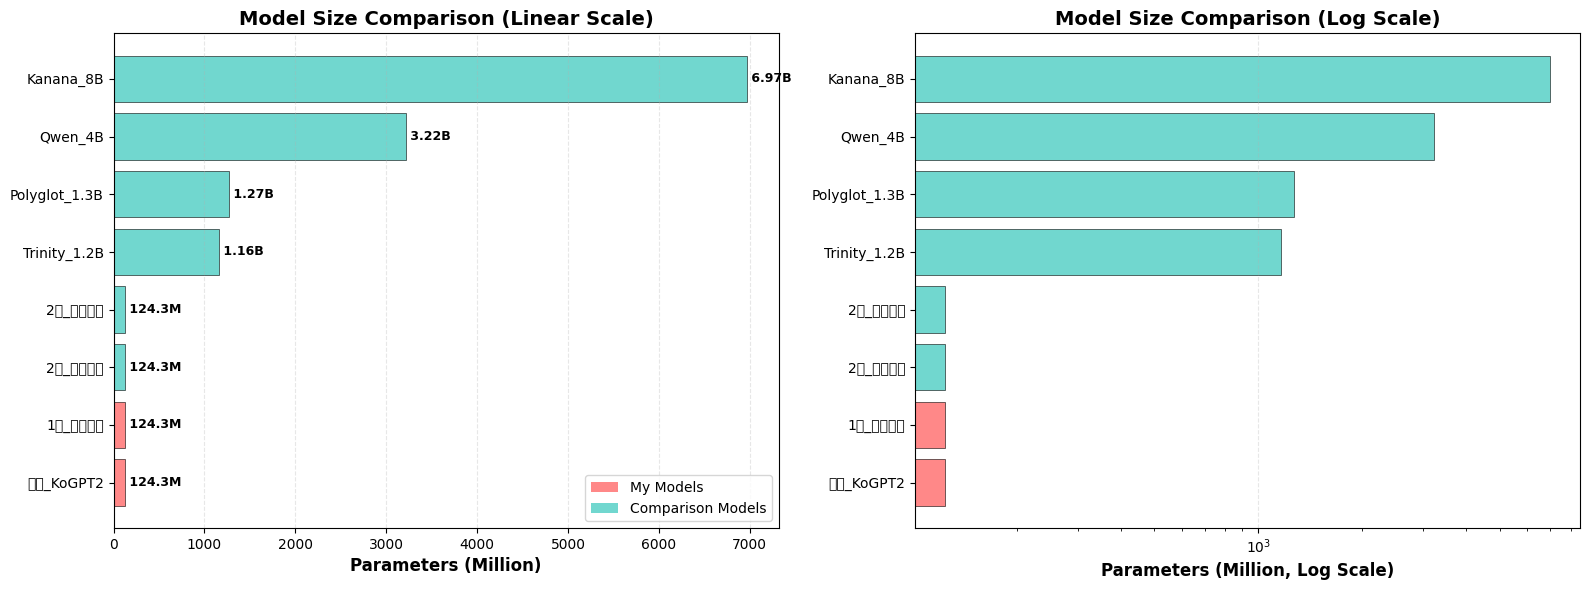

‚úÖ ÌååÏù¥ Ï∞®Ìä∏ Ï†ÄÏû•: model_memory_pie.png


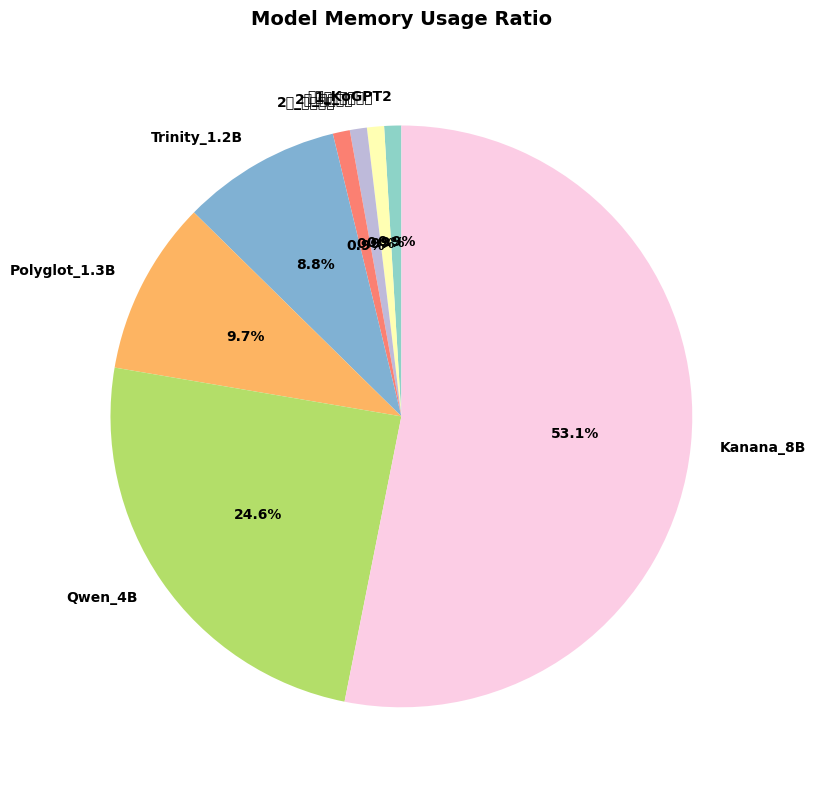


üí° Í≥µÏ†ïÌïú ÎπÑÍµêÎ•º ÏúÑÌïú Ï∂îÏ≤ú

‚úÖ Ï∂îÏ≤ú: ÌÅ¨Í∏∞Í∞Ä ÎπÑÏä∑Ìïú Î™®Îç∏ (¬±10Î∞∞ Ïù¥ÎÇ¥)
----------------------------------------------------------------------
‚úÖ Ï∂îÏ≤ú ÏõêÎ≥∏_KoGPT2            - 124.3M (1.0Î∞∞)
‚úÖ Ï∂îÏ≤ú 1Ï∞®_Ï†ÑÏ≤¥ÌäúÎãù              - 124.3M (1.0Î∞∞)
‚úÖ Ï∂îÏ≤ú 2Ï∞®_Î∞ùÏùåÌäπÌôî              - 124.3M (1.0Î∞∞)
‚úÖ Ï∂îÏ≤ú 2Ï∞®_Ïä¨ÌîîÌäπÌôî              - 124.3M (1.0Î∞∞)
‚úÖ Ï∂îÏ≤ú Trinity_1.2B         - 1.16B (9.3Î∞∞)

‚ö†Ô∏è  Ï∞∏Í≥†Ïö©: ÌÅ¨Í∏∞ Ï∞®Ïù¥ ÌÅº (10~50Î∞∞)
----------------------------------------------------------------------
‚ö†Ô∏è  Ï∞∏Í≥† Polyglot_1.3B        - 1.27B (10.2Î∞∞)
‚ö†Ô∏è  Ï∞∏Í≥† Qwen_4B              - 3.22B (25.9Î∞∞)

‚ùå ÎπÑÏ∂îÏ≤ú: ÎÑàÎ¨¥ ÌÅº (50Î∞∞ Ï¥àÍ≥º)
----------------------------------------------------------------------
‚ùå ÎπÑÏ∂îÏ≤ú Kanana_8B            - 6.97B (56.1Î∞∞)

Î∂ÑÏÑù ÏôÑÎ£å!

Ìï¥ÏÑù Í∞ÄÏù¥Îìú:
  - Í∞ôÏùÄ ÏÉâ(Îπ®Í∞ï) = ÎÇ¥ ÌååÏù∏ÌäúÎãù Î™®Îç∏Îì§ (ÎèôÏùº ÌÅ¨Í∏∞)
  - Îã§Î•∏ ÏÉâ(Ï≤≠Î°ù) = ÎπÑÍµê ÌõÑÎ≥¥ Î™®Îç∏Îì§
  -

In [ ]:
import os
import torch
import warnings
import logging
from transformers import AutoConfig, AutoModel
import matplotlib.pyplot as plt
import numpy as np

# Î™®Îì† Í≤ΩÍ≥† Î©îÏãúÏßÄ ÏôÑÏ†ÑÌûà Ïà®Í∏∞Í∏∞
warnings.filterwarnings('ignore')
logging.getLogger('matplotlib').setLevel(logging.ERROR)

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï ÏãúÎèÑ (Ïã§Ìå®Ìï¥ÎèÑ Î¨¥Ïãú)
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Sans'  # Í∏∞Î≥∏ Ìè∞Ìä∏ ÏÇ¨Ïö©
matplotlib.rcParams['axes.unicode_minus'] = False

# ÌïúÍ∏Ä ÎåÄÏã† ÏòÅÏñ¥ Î†àÏù¥Î∏î ÏÇ¨Ïö© ÏòµÏÖò
USE_ENGLISH_LABELS = False  # TrueÎ°ú Î∞îÍæ∏Î©¥ ÏòÅÏñ¥Î°ú ÌëúÏãú

# ========================================
# Î™®Îç∏ ÌÅ¨Í∏∞ ÎπÑÍµê Î∂ÑÏÑù

# ÎπÑÍµêÌï† Î™®Îç∏ Î™©Î°ù
MODELS_TO_CHECK = {
    # ÎÇ¥ Î™®Îç∏Îì§
    "ÏõêÎ≥∏_KoGPT2": "skt/kogpt2-base-v2",
    "1Ï∞®_Ï†ÑÏ≤¥ÌäúÎãù": "./kpop-kogpt2-finetuned",
    "2Ï∞®_Î∞ùÏùåÌäπÌôî": "./kpop-kogpt2-bright-2nd",
    "2Ï∞®_Ïä¨ÌîîÌäπÌôî": "./kpop-kogpt2-sad-2nd",

    # ÎπÑÍµê ÌõÑÎ≥¥ Î™®Îç∏Îì§
    "Polyglot_1.3B": "EleutherAI/polyglot-ko-1.3b",
    "Trinity_1.2B": "skt/ko-gpt-trinity-1.2B-v0.5",
    "Kanana_8B": "kakaocorp/kanana-1.5-8b-base",
    "Qwen_4B": "Qwen/Qwen3-4B-Instruct-2507",
}

def get_model_size(model_name_or_path):
    """Î™®Îç∏Ïùò ÌååÎùºÎØ∏ÌÑ∞ ÏàòÏôÄ Î©îÎ™®Î¶¨ ÌÅ¨Í∏∞ Í≥ÑÏÇ∞"""
    try:
        print(f"Î∂ÑÏÑù Ï§ë: {model_name_or_path}")

        # Î°úÏª¨ Î™®Îç∏Ïù∏ Í≤ΩÏö∞ Í≤ΩÎ°ú ÌôïÏù∏
        if model_name_or_path.startswith("./"):
            if not os.path.exists(model_name_or_path):
                return None

        # Config Î°úÎìú (Î™®Îç∏ Ï†ÑÏ≤¥Î•º Î°úÎìúÌïòÏßÄ ÏïäÍ≥† ÏÑ§Ï†ïÎßå)
        config = AutoConfig.from_pretrained(model_name_or_path)

        # ÌååÎùºÎØ∏ÌÑ∞ Ïàò Ï∂îÏ†ï
        if hasattr(config, 'n_params'):
            num_params = config.n_params
        elif hasattr(config, 'num_parameters'):
            num_params = config.num_parameters
        else:
            # ÏßÅÏ†ë Í≥ÑÏÇ∞ (GPT Ïä§ÌÉÄÏùº Î™®Îç∏ Í∏∞Ï§Ä)
            vocab_size = config.vocab_size
            hidden_size = config.hidden_size if hasattr(config, 'hidden_size') else config.n_embd
            num_layers = config.num_hidden_layers if hasattr(config, 'num_hidden_layers') else config.n_layer

            # Í∞ÑÎã®Ìïú Ï∂îÏ†ï Í≥µÏãù
            embedding_params = vocab_size * hidden_size
            layer_params = num_layers * (12 * hidden_size**2)  # ÎåÄÎûµÏ†Å Ï∂îÏ†ï
            num_params = embedding_params + layer_params

        # Î©îÎ™®Î¶¨ ÌÅ¨Í∏∞ Ï∂îÏ†ï (float32 Í∏∞Ï§Ä)
        memory_mb = (num_params * 4) / (1024 ** 2)  # Î∞îÏù¥Ìä∏ ‚Üí MB
        memory_gb = memory_mb / 1024

        return {
            "params": num_params,
            "params_m": num_params / 1e6,  # Î∞±Îßå Îã®ÏúÑ
            "params_b": num_params / 1e9,  # Ïã≠Ïñµ Îã®ÏúÑ
            "memory_mb": memory_mb,
            "memory_gb": memory_gb,
            "config": config
        }

    except Exception as e:
        print(f"   ‚ö†Ô∏è Ïò§Î•ò: {e}")
        return None

def format_number(num):
    """Ïà´ÏûêÎ•º ÏùΩÍ∏∞ ÏâΩÍ≤å Ìè¨Îß∑ÌåÖ"""
    if num >= 1e9:
        return f"{num/1e9:.2f}B"
    elif num >= 1e6:
        return f"{num/1e6:.1f}M"
    else:
        return f"{num:.0f}"

# ========================================
# Î©îÏù∏ Î∂ÑÏÑù

print("="*70)
print("Î™®Îç∏ ÌÅ¨Í∏∞ ÎπÑÍµê Î∂ÑÏÑù")
print("="*70)

results = {}
for name, path in MODELS_TO_CHECK.items():
    result = get_model_size(path)
    if result:
        results[name] = result
        print(f"‚úÖ {name}: {format_number(result['params'])} ÌååÎùºÎØ∏ÌÑ∞")
    else:
        print(f"‚ùå {name}: Î∂ÑÏÑù Ïã§Ìå® (Î™®Îç∏ ÏóÜÏùå)")
    print()

# ÏÉÅÏÑ∏ Í≤∞Í≥º ÌÖåÏù¥Î∏î

if results:
    print("\n" + "="*70)
    print("ÏÉÅÏÑ∏ ÎπÑÍµê ÌÖåÏù¥Î∏î")
    print("="*70)
    print(f"{'Î™®Îç∏Î™Ö':<20} {'ÌååÎùºÎØ∏ÌÑ∞ Ïàò':>15} {'Î©îÎ™®Î¶¨(GB)':>12} {'Î≤†Ïù¥Ïä§ ÎåÄÎπÑ':>12}")
    print("-"*70)

    # Í∏∞Ï§Ä Î™®Îç∏ (ÏõêÎ≥∏ KoGPT2)
    base_params = results.get("ÏõêÎ≥∏_KoGPT2", {}).get("params", 1)

    for name, info in results.items():
        params_str = format_number(info['params'])
        memory_str = f"{info['memory_gb']:.2f} GB"
        ratio = info['params'] / base_params
        ratio_str = f"{ratio:.1f}x" if ratio >= 1 else f"1/{1/ratio:.1f}x"

        print(f"{name:<20} {params_str:>15} {memory_str:>12} {ratio_str:>12}")

# ========================================
# ÏãúÍ∞ÅÌôî 1: ÌååÎùºÎØ∏ÌÑ∞ Ïàò ÎπÑÍµê (ÎßâÎåÄ Í∑∏ÎûòÌîÑ)

if results:
    print("\n" + "="*70)
    print("ÏãúÍ∞ÅÌôî ÏÉùÏÑ± Ï§ë...")
    print("="*70)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Ï†ïÎ†¨ (ÌÅ¨Í∏∞ Ïàú)
    sorted_results = sorted(results.items(), key=lambda x: x[1]['params'])
    names = [item[0] for item in sorted_results]
    params = [item[1]['params_m'] for item in sorted_results]

    # ÏÉâÏÉÅ Íµ¨Î∂Ñ (ÎÇ¥ Î™®Îç∏ vs Îã§Î•∏ Î™®Îç∏)
    colors = []
    for name in names:
        if 'ÌäúÎãù' in name or 'KoGPT2' in name:
            colors.append('#FF6B6B')  # Îπ®Í∞ÑÏÉâ Í≥ÑÏó¥ (ÎÇ¥ Î™®Îç∏)
        else:
            colors.append('#4ECDC4')  # Ï≤≠Î°ùÏÉâ (Îã§Î•∏ Î™®Îç∏)

    # Í∑∏ÎûòÌîÑ 1: ÏÑ†Ìòï Ïä§ÏºÄÏùº
    bars1 = ax1.barh(names, params, color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
    ax1.set_xlabel('Parameters (Million)', fontsize=12, fontweight='bold')
    ax1.set_title('Model Size Comparison (Linear Scale)', fontsize=14, fontweight='bold')
    ax1.grid(axis='x', alpha=0.3, linestyle='--')

    # Í∞í ÌëúÏãú
    for i, (bar, param) in enumerate(zip(bars1, params)):
        ax1.text(param, i, f' {format_number(param*1e6)}',
                va='center', fontsize=9, fontweight='bold')

    # Í∑∏ÎûòÌîÑ 2: Î°úÍ∑∏ Ïä§ÏºÄÏùº
    bars2 = ax2.barh(names, params, color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
    ax2.set_xlabel('Parameters (Million, Log Scale)', fontsize=12, fontweight='bold')
    ax2.set_title('Model Size Comparison (Log Scale)', fontsize=14, fontweight='bold')
    ax2.set_xscale('log')
    ax2.grid(axis='x', alpha=0.3, linestyle='--')

    # Î≤îÎ°Ä
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#FF6B6B', alpha=0.8, label='My Models'),
        Patch(facecolor='#4ECDC4', alpha=0.8, label='Comparison Models')
    ]
    ax1.legend(handles=legend_elements, loc='lower right')

    plt.tight_layout()
    plt.savefig('model_size_comparison.png', dpi=150, bbox_inches='tight')
    print("‚úÖ Í∑∏ÎûòÌîÑ Ï†ÄÏû•: model_size_comparison.png")
    plt.show()


# ÏãúÍ∞ÅÌôî 2: ÌååÏù¥ Ï∞®Ìä∏ (Î©îÎ™®Î¶¨ ÎπÑÏú®)

if results:
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))

    # Î©îÎ™®Î¶¨ Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨
    sorted_by_memory = sorted(results.items(), key=lambda x: x[1]['memory_gb'])
    names_memory = [item[0] for item in sorted_by_memory]
    memory_gb = [item[1]['memory_gb'] for item in sorted_by_memory]

    # ÌååÏù¥ Ï∞®Ìä∏
    colors_pie = plt.cm.Set3(range(len(names_memory)))
    wedges, texts, autotexts = ax.pie(
        memory_gb,
        labels=names_memory,
        autopct='%1.1f%%',
        colors=colors_pie,
        startangle=90,
        textprops={'fontsize': 10, 'fontweight': 'bold'}
    )

    ax.set_title('Model Memory Usage Ratio', fontsize=14, fontweight='bold', pad=20)

    plt.tight_layout()
    plt.savefig('model_memory_pie.png', dpi=150, bbox_inches='tight')
    print("‚úÖ ÌååÏù¥ Ï∞®Ìä∏ Ï†ÄÏû•: model_memory_pie.png")
    plt.show()


# Ï∂îÏ≤ú ÎπÑÍµê Î™®Îç∏ Ï∂úÎ†•

print("\n" + "="*70)
print("üí° Í≥µÏ†ïÌïú ÎπÑÍµêÎ•º ÏúÑÌïú Ï∂îÏ≤ú")
print("="*70)

if "ÏõêÎ≥∏_KoGPT2" in results:
    base_params = results["ÏõêÎ≥∏_KoGPT2"]["params"]

    print("\n‚úÖ Ï∂îÏ≤ú: ÌÅ¨Í∏∞Í∞Ä ÎπÑÏä∑Ìïú Î™®Îç∏ (¬±10Î∞∞ Ïù¥ÎÇ¥)")
    print("-"*70)

    for name, info in results.items():
        ratio = info['params'] / base_params
        if 0.1 <= ratio <= 10:  # 10Î∞∞ Ïù¥ÎÇ¥
            status = "‚úÖ Ï∂îÏ≤ú"
            print(f"{status} {name:<20} - {format_number(info['params'])} ({ratio:.1f}Î∞∞)")

    print("\n‚ö†Ô∏è  Ï∞∏Í≥†Ïö©: ÌÅ¨Í∏∞ Ï∞®Ïù¥ ÌÅº (10~50Î∞∞)")
    print("-"*70)

    for name, info in results.items():
        ratio = info['params'] / base_params
        if 10 < ratio <= 50:
            status = "‚ö†Ô∏è  Ï∞∏Í≥†"
            print(f"{status} {name:<20} - {format_number(info['params'])} ({ratio:.1f}Î∞∞)")

    print("\n‚ùå ÎπÑÏ∂îÏ≤ú: ÎÑàÎ¨¥ ÌÅº (50Î∞∞ Ï¥àÍ≥º)")
    print("-"*70)

    for name, info in results.items():
        ratio = info['params'] / base_params
        if ratio > 50:
            status = "‚ùå ÎπÑÏ∂îÏ≤ú"
            print(f"{status} {name:<20} - {format_number(info['params'])} ({ratio:.1f}Î∞∞)")

print("\n" + "="*70)
print("Î∂ÑÏÑù ÏôÑÎ£å!")
print("="*70)
print("""
Ìï¥ÏÑù Í∞ÄÏù¥Îìú:
  - Í∞ôÏùÄ ÏÉâ(Îπ®Í∞ï) = ÎÇ¥ ÌååÏù∏ÌäúÎãù Î™®Îç∏Îì§ (ÎèôÏùº ÌÅ¨Í∏∞)
  - Îã§Î•∏ ÏÉâ(Ï≤≠Î°ù) = ÎπÑÍµê ÌõÑÎ≥¥ Î™®Îç∏Îì§
  - 10Î∞∞ Ïù¥ÎÇ¥ Ï∞®Ïù¥ = Í≥µÏ†ïÌïú ÎπÑÍµê Í∞ÄÎä•
  - 50Î∞∞ Ïù¥ÏÉÅ Ï∞®Ïù¥ = ÎπÑÍµê ÏùòÎØ∏ ÏóÜÏùå (ÎãπÏó∞Ìûà ÌÅ∞ Î™®Îç∏Ïù¥ Ïú†Î¶¨)

ÏµúÏ¢Ö Ï∂îÏ≤ú:
  ÏõêÎ≥∏_KoGPT2, 1Ï∞®_Ï†ÑÏ≤¥ÌäúÎãù, 2Ï∞®_Î∞ùÏùåÌäπÌôî, 2Ï∞®_Ïä¨ÌîîÌäπÌôî
  + Polyglot_1.3B, Trinity_1.2B (ÏÑ†ÌÉù)
""")

### Î™®Îç∏ ÌèâÍ∞Ä

K-pop Lyrics Generation Model Comprehensive Evaluation

Evaluating: Original_KoGPT2
Loading model and tokenizer...


The model is already on multiple devices. Skipping the move to device specified in `args`.



1Ô∏è‚É£ Calculating Perplexity...


   ‚úì Perplexity: 36.63

2Ô∏è‚É£ Generating text samples...
   ‚úì Generated 25 samples

3Ô∏è‚É£ Calculating diversity metrics...
   ‚úì Distinct-1: 0.5256
   ‚úì Distinct-2: 0.8146

4Ô∏è‚É£ Analyzing emotion keywords...
   ‚úì Bright keyword avg: 2.12
   ‚úì Sad keyword avg: 0.88
   ‚úì Emotion bias: 1.24

5Ô∏è‚É£ Analyzing generation quality...
   ‚úì Repetition ratio: 0.0486
   ‚úì Average length: 36.8 words

Sample generations (first 2):

[Sample 1]
Îã§ÎãàÍ≥† ÏûàÎäî Ï§ëÏù¥Îã§.
Ïù¥Î≤àÏóê ÏÑ†Î≥¥Ïù∏ ‚ÄòÎ∏îÎûôÎ∞ïÏä§‚ÄôÎäî ÎÇ¥ÎπÑÍ≤åÏù¥ÏÖòÏùò Í∏∞Îä•ÏùÑ Ïä§ÎßàÌä∏Ìè∞Ïùò Ïπ¥Î©îÎùºÎ°ú Ï¥¨ÏòÅÌïú ÌõÑ ÎÇ¥Ïû•Îêú MP3ÌååÏùºÏùÑ ÌÜµÌï¥ Ïã§ÏãúÍ∞ÑÏúºÎ°ú Ïû¨ÏÉùÌï† Ïàò ÏûàÎäî Ï†úÌíàÏù¥Îã§.
ÌäπÌûà Î∏îÎûôÎ∞ïÏä§ Í∏∞...

[Sample 2]
Îã§ÎãàÎ©¥ÏÑú ÏùºÏÉÅÏùÑ ÏÇ¥ÏïÑÍ∞ÄÎäî ÏÇ¨ÎûåÎì§ÏùÑ Î≥¥Î©¥ Í∞ÄÏä¥Ïù¥ ÏïÑÌîå ÎïåÍ∞Ä ÎßéÎã§.
ÌïòÏßÄÎßå Ïù¥Îü∞ ÏÇ¨ÎûåÎì§ÏóêÍ≤åÎäî ‚ÄòÌñâÎ≥µ‚ÄôÏù¥ÎùºÎäî Îã®Ïñ¥Î•º Îñ†Ïò¨Î¶¥ Ïàò ÏûàÎäî Ï¢ãÏùÄ Î∞©Î≤ïÏù¥ ÏûàÎã§.
Î∞îÎ°ú ‚ÄòÍ±¥Í∞ïÌïú Ïã†Ï≤¥‚ÄôÎ•º ÎßåÎì§Ïñ¥Ï£ºÎäî...

‚úÖ Original_KoGPT2 eval

The model is already on multiple devices. Skipping the move to device specified in `args`.



1Ô∏è‚É£ Calculating Perplexity...


   ‚úì Perplexity: 1.33

2Ô∏è‚É£ Generating text samples...
   ‚úì Generated 25 samples

3Ô∏è‚É£ Calculating diversity metrics...
   ‚úì Distinct-1: 0.3744
   ‚úì Distinct-2: 0.5911

4Ô∏è‚É£ Analyzing emotion keywords...
   ‚úì Bright keyword avg: 1.56
   ‚úì Sad keyword avg: 1.44
   ‚úì Emotion bias: 0.12

5Ô∏è‚É£ Analyzing generation quality...
   ‚úì Repetition ratio: 0.0085
   ‚úì Average length: 31.2 words

Sample generations (first 2):

[Sample 1]

Yeah ÎÇ† ÎßåÎì† ÏÇ¨Îûå Î∞îÎ°ú ÎÑàÎãàÍπå

ÎÇú Ïó¨ÌÉú ÎÑ§Í∞Ä Î≥∏ Ï†Å ÏóÜÎäî brand new filter
ÎÇ¥Í≤å ÎÑê Îß°Í≤®Î¥ê
Îçî ÏßúÎ¶øÌïú Í±∏ Î≥º Ïàò ÏûàÍ≤å pick your filter
ÎÇòÎßåÏùÑ Îã¥...

[Sample 2]
ÎÜÄÍ≥§ Ìï¥
Ïù¥Ï†ú Í∑∏Îßå Í∫ºÏ†∏ Ï§ÑÎûò ÎÇ¥Í≤åÏÑú

One night Ïñ¥Îë† ÏÜçÏóê Î≥¥Ïù∏ Í±¥
ÎÇòÎ•º Ï´ìÎçò Í∏∞Î¨òÌñàÎçò Í∑∏Î¶ºÏûê
Î∂àÏù¥ ÏºúÏßÑ exit light
Í±∞Ïö∏ ÏÜçÏùò ÎÇòÎ•º Î≥¥Í≥† ÏûàÎäî ÎÇò

ÎÇ¥Í≤åÏÑú ÏÇ¨ÎùºÏ†∏...

‚úÖ Stage1_All evaluation complete!

Evaluating: Stage2_Bright
Loading model and tokenizer...


The model is already on multiple devices. Skipping the move to device specified in `args`.



1Ô∏è‚É£ Calculating Perplexity...


   ‚úì Perplexity: 1.34

2Ô∏è‚É£ Generating text samples...
   ‚úì Generated 25 samples

3Ô∏è‚É£ Calculating diversity metrics...
   ‚úì Distinct-1: 0.3456
   ‚úì Distinct-2: 0.5702

4Ô∏è‚É£ Analyzing emotion keywords...
   ‚úì Bright keyword avg: 1.28
   ‚úì Sad keyword avg: 0.48
   ‚úì Emotion bias: 0.80

5Ô∏è‚É£ Analyzing generation quality...
   ‚úì Repetition ratio: 0.0548
   ‚úì Average length: 29.9 words

Sample generations (first 2):

[Sample 1]

ÎßêÎ¶¨ÏßÄ Îßà ÏßÄÍ∏à ÎÇ¥ Í∏∞Î∂ÑÏùÄ
feel so high
Î©ÄÎ¶¨ Î©ÄÎ¶¨ Î©ÄÎ¶¨ Îã§ ÎààÎ∂ÄÏÖî
I just wanna Dun Dun Dance
Dun Dun Dance Dun Dun Dance
O...

[Sample 2]
ÎÜÄÍ∏∞Î•º

I‚Äôm gonna make it
Ï∞®Ïóê ÌÉÄÎ¥ê uh
Before I hop out uh yeah
Í≥ºÏó∞ ÎàÑÍ∞Ä hot uh yeah
Brother u not uh
H1

‚úÖ Stage2_Bright evaluation complete!

Evaluating: Stage2_Sad
Loading model and tokenizer...


The model is already on multiple devices. Skipping the move to device specified in `args`.



1Ô∏è‚É£ Calculating Perplexity...


   ‚úì Perplexity: 1.36

2Ô∏è‚É£ Generating text samples...
   ‚úì Generated 25 samples

3Ô∏è‚É£ Calculating diversity metrics...
   ‚úì Distinct-1: 0.3650
   ‚úì Distinct-2: 0.6019

4Ô∏è‚É£ Analyzing emotion keywords...
   ‚úì Bright keyword avg: 1.00
   ‚úì Sad keyword avg: 1.40
   ‚úì Emotion bias: -0.40

5Ô∏è‚É£ Analyzing generation quality...
   ‚úì Repetition ratio: 0.0394
   ‚úì Average length: 29.6 words

Sample generations (first 2):

[Sample 1]
Î¥ê
Í∞ÄÏû• Í∞ÄÍπåÏö¥ Î∞îÎã§
ÌòºÏûêÎßåÏùò ÏòÅÌôîÍ¥Ä
Í∑∏ÎÉ• Ïù¥ÎÅåÎ¶¨Îäî ÎåÄÎ°ú Ìï¥ÎèÑ Í¥úÏ∞ÆÏúºÎãàÍπå
ÌõåÏ©ç Îñ†ÎÇòÎ≥¥Îäî drive
ÎöúÎ≤Ö Í±∏Ïñ¥ÎèÑ Ï¢ãÏïÑ
Î≠êÎì† Î∞úÍ∏∏ ÎãøÎäî ÎåÄÎ°ú ÏßÄÍ∏à Îñ†ÎÇòÎ≥¥Î†§ Ìï¥ oh

<|endofte...

[Sample 2]
ÎÜÄÍ≥§ Ìï¥
Í∑∏Îü∞Îç∞ Ïù¥Í≤å Î≠êÎûÑÍπå ÎÇú ÎÇú Ïà† ÌïúÏûîÌïòÎ©¥ÏÑú
Í¥úÏ∞ÆÏùÄ ÎìØ ÏñòÍ∏∞ÌïòÎ©∞ ÎÑê ÌÑ∏Ïñ¥ÎÉàÎäîÎç∞
ÏßëÏúºÎ°ú ÎèåÏïÑÏò§Î©¥ÏÑú
Ìïú Î≤à Îçî Îñ†Ïò§Î•∏ Í∏∞ÏñµÏóê
Í±∏ÏùåÏùÑ Î©àÏ∂∞ ÏÑúÏÑú Ïù¥Î†áÍ≤å Ïö∏Í≥† ÏûàÏñ¥
ÏûêÏó∞Ïä§ÎüΩÍ≤å Î∞úÍ±∏Ïùå...

‚úÖ Stage2_Sad evaluation complete!

Evaluating: Trinity_1.2

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/109 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/4.68G [00:00<?, ?B/s]

The model is already on multiple devices. Skipping the move to device specified in `args`.



1Ô∏è‚É£ Calculating Perplexity...


   ‚úì Perplexity: 22036.57

2Ô∏è‚É£ Generating text samples...
   ‚úì Generated 25 samples

3Ô∏è‚É£ Calculating diversity metrics...
   ‚úì Distinct-1: 0.4313
   ‚úì Distinct-2: 0.6178

4Ô∏è‚É£ Analyzing emotion keywords...
   ‚úì Bright keyword avg: 1.68
   ‚úì Sad keyword avg: 0.60
   ‚úì Emotion bias: 1.08

5Ô∏è‚É£ Analyzing generation quality...
   ‚úì Repetition ratio: 0.0418
   ‚úì Average length: 26.2 words

Sample generations (first 2):

[Sample 1]
ÎÜÄÍ≥† ÏûàÎäî ÏïÑÏù¥Îì§. 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
...

[Sample 2]
Îã§ÎãàÎäî Î™®ÏäµÏù¥ Îã¥Í∏¥ ÎèôÏòÅÏÉÅÏùÑ Í≥µÍ∞úÌñàÎã§. ÎãπÏãú ÏòÅÏÉÅÏóêÏÑú Ïù¥ Íµ∞ÏùÄ ÎÖ∏ÎûÄÏÉâ Ïò∑ÏùÑ ÏûÖÏùÄ Ï±Ñ Î∞∞ÎÇ≠Ïóê ÏÜêÏùÑ ÎÑ£Ïñ¥ Î∞∞ÎÇ≠ÏùÑ ÌùîÎì§Î©¥ÏÑú Îõ∞ÏóàÎã§.
 Ïù¥ Íµ∞ÏùÄ "ÏπúÍµ¨Îì§Ïù¥Îûë ÎÜÄÎ©¥ÏÑú Îõ∞Í≥† ÏûàÎäîÎç∞ Í∞ëÏûêÍ∏∞ Î∞∞...

‚úÖ Trinity_1.2B evaluation complete!

Evaluating: Polyglot_1.3B
Loading model and tokenizer...


tokenizer_config.json:   0%|          | 0.00/164 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/185 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/748M [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/1.00G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]


1Ô∏è‚É£ Calculating Perplexity...


The model is already on multiple devices. Skipping the move to device specified in `args`.


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


   ‚úì Perplexity: 151.29

2Ô∏è‚É£ Generating text samples...
   ‚úì Generated 25 samples

3Ô∏è‚É£ Calculating diversity metrics...
   ‚úì Distinct-1: 0.2304
   ‚úì Distinct-2: 0.4768

4Ô∏è‚É£ Analyzing emotion keywords...
   ‚úì Bright keyword avg: 1.40
   ‚úì Sad keyword avg: 0.76
   ‚úì Emotion bias: 0.64

5Ô∏è‚É£ Analyzing generation quality...
   ‚úì Repetition ratio: 0.0096
   ‚úì Average length: 18.2 words

Sample generations (first 2):

[Sample 1]
ÎÜÄÍ≥†, Ìï®Íªò Ïù¥ÏïºÍ∏∞Î•º ÎÇòÎàÑÎ©∞, Ìï®Íªò ÏõÉÍ≥†, Ìï®Íªò Ïö∏Í≥†, Ìï®Íªò ÌôîÎÇ¥Î©∞, Ìï®Íªò Ïä¨ÌçºÌïòÍ≥†, Ìï®Íªò Í∏∞ÎªêÌïòÎ©∞, Ìï®Íªò ÏÇ¨ÎûëÌïòÎäî Í∑∏Îü∞ ÏÑ∏ÏÉÅÏùÑ ÎßåÎì§Í∏∞ ÏúÑÌï¥ ÎÇòÎäî Ïò§ÎäòÎèÑ ÏµúÏÑ†ÏùÑ Îã§Ìï¥ Îõ∞Í≥† ÏûàÎã§.‚Äã...

[Sample 2]
ÎÜÄÍ≥† Ïã∂ÏùÄ ÎßàÏùåÏù¥ÏóàÎã§. Í∑∏Îäî ÎÇòÎ•º ÎÅåÍ≥† ÏÇ∞ÏùÑ ÎÇ¥Î†§ÏôîÎã§. Í∑∏Îäî ÏÇ∞ÏùÑ ÎÇ¥Î†§Ïò§Î©¥ÏÑú ÎÇòÏóêÍ≤å ÎßêÌñàÎã§. "ÎÑàÎäî ÏÇ∞Ïóê Í∞ÄÎ©¥ Ïñ∏Ï†úÎÇò ÌòºÏûê ÏûàÏùÑ Í≤É Í∞ôÏïÑ?" "ÏïÑÎãàÏóêÏöî." "ÎÑàÎäî Ìï≠ÏÉÅ ÌòºÏûê ÏûàÍ≥† ...

‚úÖ Polyglot_1.3B evaluation complete!

Creating visualiz

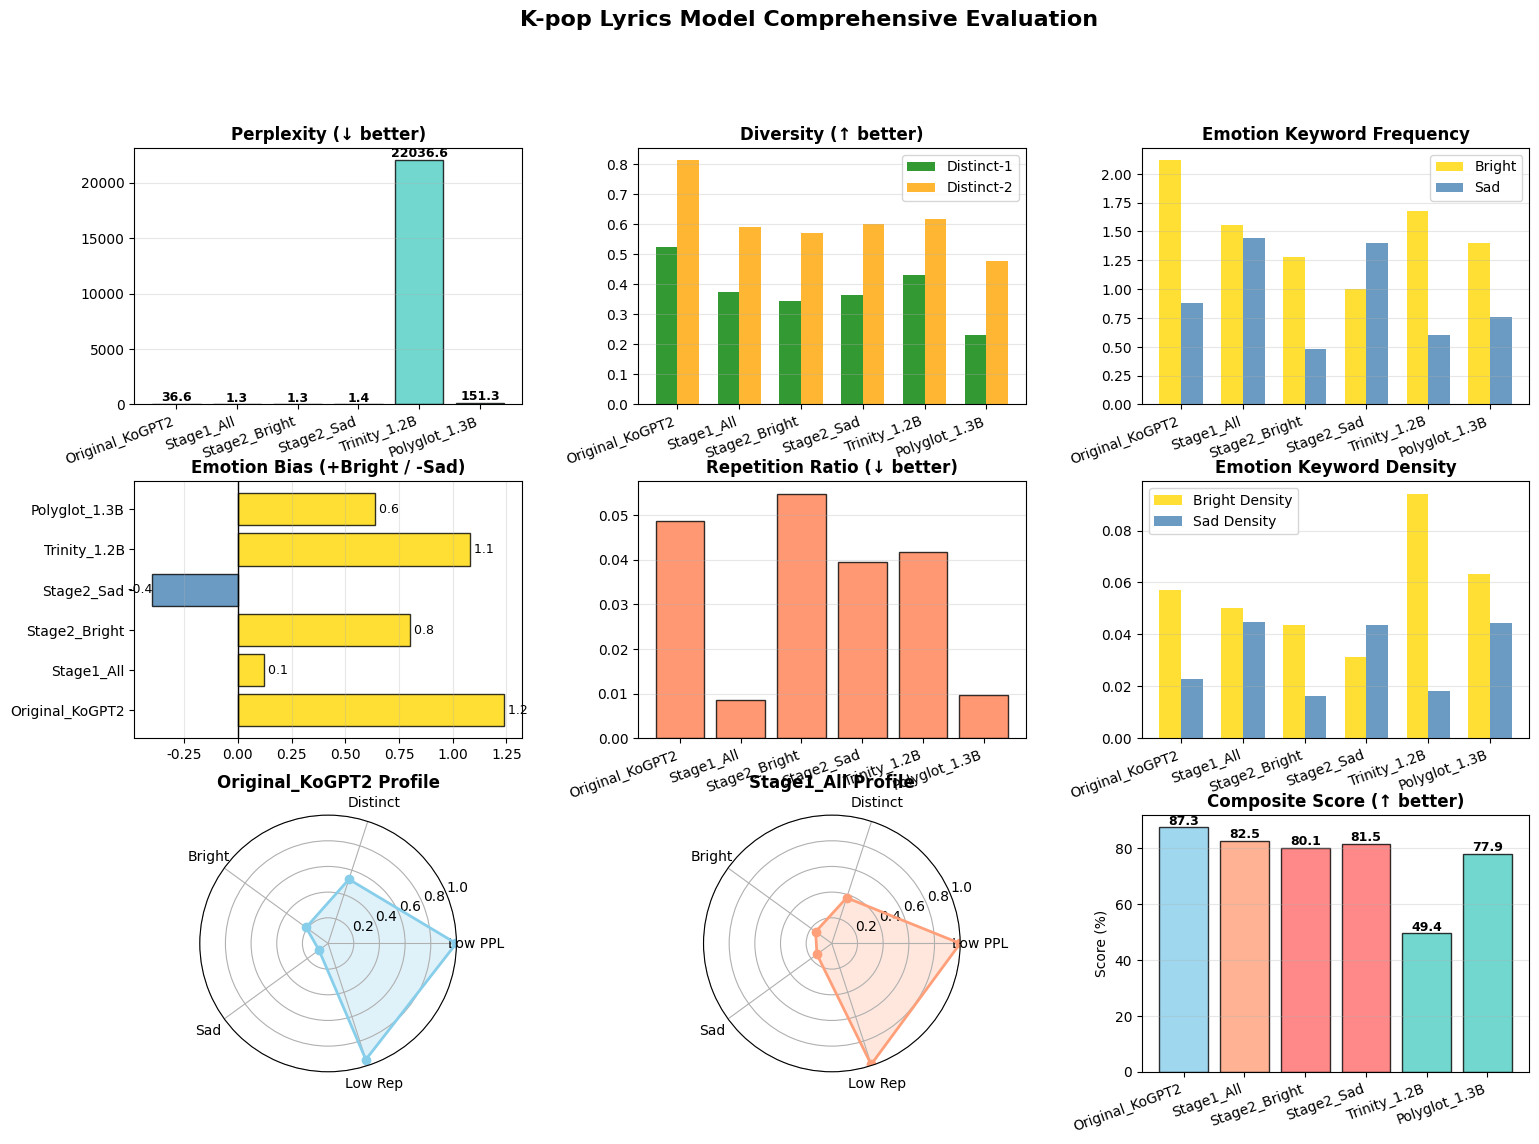


Final Summary Table

Model                     PPL     D-1     D-2  Bright     Sad    Bias     Rep
----------------------------------------------------------------------
Original_KoGPT2          36.6  0.5256  0.8146    2.12    0.88    1.24  0.0486
Stage1_All                1.3  0.3744  0.5911    1.56    1.44    0.12  0.0085
Stage2_Bright             1.3  0.3456  0.5702    1.28    0.48    0.80  0.0548
Stage2_Sad                1.4  0.3650  0.6019    1.00    1.40   -0.40  0.0394
Trinity_1.2B          22036.6  0.4313  0.6178    1.68    0.60    1.08  0.0418
Polyglot_1.3B           151.3  0.2304  0.4768    1.40    0.76    0.64  0.0096

‚úÖ Evaluation Complete!

Interpretation Guide:
  - PPL ‚Üì: Lower is better (better language modeling)
  - D-1/2 ‚Üë: Higher is better (more diverse vocabulary)
  - Bright/Sad: Emotion keyword frequency
  - Bias: +Bright tendency / -Sad tendency
  - Rep ‚Üì: Lower is better (less repetition, no overfitting)
  
Expected Results:
  - Original: High PPL, neutr

In [ ]:
import os
import math
import random
import numpy as np
import torch
import warnings
import logging
import matplotlib.pyplot as plt
from collections import Counter
from transformers import (
    AutoTokenizer, AutoModelForCausalLM,
    TextDataset, DataCollatorForLanguageModeling,
    Trainer, TrainingArguments
)

# Í≤ΩÍ≥† Ïà®Í∏∞Í∏∞
warnings.filterwarnings('ignore')
logging.getLogger('matplotlib').setLevel(logging.ERROR)


# ÏÑ§Ï†ï

# ÌèâÍ∞ÄÌï† Î™®Îç∏ (ÌÅ¨Í∏∞ Î∂ÑÏÑù Í≤∞Í≥º Í∏∞Î∞ò)
MODEL_CONFIGS = {
    # ÌïÑÏàò ÎπÑÍµê (Í∞ôÏùÄ ÌÅ¨Í∏∞)
    "Original_KoGPT2": "skt/kogpt2-base-v2",
    "Stage1_All": "./kpop-kogpt2-finetuned",
    "Stage2_Bright": "./kpop-kogpt2-bright-2nd",
    "Stage2_Sad": "./kpop-kogpt2-sad-2nd",

    # ÏÑ†ÌÉù ÎπÑÍµê (ÎπÑÏä∑Ìïú ÌÅ¨Í∏∞)
    "Trinity_1.2B": "skt/ko-gpt-trinity-1.2B-v0.5",
    "Polyglot_1.3B": "EleutherAI/polyglot-ko-1.3b",
}

# ÌèâÍ∞Ä ÏÑ§Ï†ï
TEST_TXT_PATH = "./kpop_lyrics_train.txt"  # ÌèâÍ∞ÄÏö© ÌÖçÏä§Ìä∏
PROMPTS = [
    "Ìï®Íªò Îõ∞Ïñ¥",
    "ÌòºÏûê ÎÇ®ÏùÄ",
    "ÍøàÏùÑ Ìñ•Ìï¥",
    "ÎπÑ Ïò§Îäî Î∞§",
    "ÎπõÎÇòÎäî Ïö∞Î¶¨",
]

# Í∞êÏÑ± ÌÇ§ÏõåÎìú (ÌïÑÌÑ∞ÎßÅ ÎïåÏôÄ ÎèôÏùºÌïòÍ≤å ÏÇ¨Ïö©)
BRIGHT_KEYWORDS = [
    # Í∏çÏ†ï Í∞êÏ†ï
    'ÌñâÎ≥µ', 'Ï¶êÍ±∞', 'Ïã†ÎÇò', 'ÏõÉ', 'ÏÇ¨ÎûëÌï¥', 'Ï¢ãÏïÑ', 'Í∏∞ÏÅ®', 'ÌôòÌò∏',
    # ÌååÌã∞/ÎåÑÏä§
    'Ï∂§', 'Îõ∞', 'ÎÇ†ÏïÑ', 'ÌååÌã∞', 'ÎÜÄ', 'Ìï®Íªò', 'Ïö∞Î¶¨',
    # ÏóêÎÑàÏßÄ/ÎèôÍ∏∞Î∂ÄÏó¨
    'Íøà', 'Ìù¨Îßù', 'Îπõ', 'Î≥Ñ', 'ÎπõÎÇò', 'Î∞òÏßù', 'ÎÅùÍπåÏßÄ', 'Í∞ÄÏûê',
    # ÏòÅÏñ¥ ÌëúÌòÑ
    'party', 'dance', 'happy', 'love', 'shine', 'bright',
    'fun', 'yeah', 'tonight', 'together', 'dream', 'fly',
    'everybody', 'celebrate', 'energy', 'power'
]

SAD_KEYWORDS = [
    # Î∂ÄÏ†ï Í∞êÏ†ï
    'Ïä¨Ìîî', 'ÎààÎ¨º', 'ÏïÑÌîî', 'ÌûòÎì§', 'Ïô∏Î°ú', 'Í∑∏Î¶¨', 'ÎØ∏Ïïà', 'ÌõÑÌöå',
    # Ïù¥Î≥Ñ/ÏÉÅÏã§
    'Ïù¥Î≥Ñ', 'Ìó§Ïñ¥', 'Îñ†ÎÇò', 'Î≥¥ÎÇ¥', 'Ïûä', 'Í∏∞Ïñµ', 'Ï∂îÏñµ', 'ÏßÄÎÇú',
    # Í∑∏Î¶¨ÏõÄ/Ïì∏Ïì∏Ìï®
    'ÎπÑ', 'Ï∞®Í∞Ä', 'Ïñ¥Îë†', 'Î∞§', 'ÌòºÏûê', 'ÌÖÖ Îπà', 'Ïì∏Ïì∏',
    # ÏòÅÏñ¥ ÌëúÌòÑ
    'goodbye', 'sorry', 'hurt', 'pain', 'lonely', 'sad',
    'tear', 'cry', 'miss', 'empty', 'alone', 'cold',
    'darkness', 'rain', 'regret', 'broken'
]

BLOCK_SIZE = 128
MAX_NEW_TOKENS = 64
NUM_SAMPLES = 5
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# =================================
# ÌèâÍ∞Ä Ìï®ÏàòÎì§

def distinct_n(seqs, n):
    """Distinct-n Í≥ÑÏÇ∞ (Îã§ÏñëÏÑ±)"""
    total = 0
    uniq = set()
    for seq in seqs:
        if len(seq) < n:
            continue
        total += len(seq) - n + 1
        for i in range(len(seq) - n + 1):
            uniq.add(tuple(seq[i:i+n]))
    return len(uniq) / total if total > 0 else 0.0

def repetition_ratio(text, n=4):
    """Î∞òÎ≥µ Ìå®ÌÑ¥ ÎπÑÏú® (ÎÇÆÏùÑÏàòÎ°ù Ï¢ãÏùå)"""
    words = text.split()
    if len(words) < n:
        return 0.0
    ngrams = [tuple(words[i:i+n]) for i in range(len(words)-n+1)]
    if not ngrams:
        return 0.0
    return 1 - len(set(ngrams)) / len(ngrams)

def emotion_keyword_count(text, keywords):
    """Í∞êÏÑ± ÌÇ§ÏõåÎìú Ï∂úÌòÑ ÌöüÏàò"""
    text_lower = text.lower()
    count = 0
    for keyword in keywords:
        count += text_lower.count(keyword.lower())
    return count

def emotion_keyword_density(text, keywords):
    """Í∞êÏÑ± ÌÇ§ÏõåÎìú Î∞ÄÎèÑ"""
    word_count = len(text.split())
    keyword_count = emotion_keyword_count(text, keywords)
    return keyword_count / word_count if word_count > 0 else 0.0

# ========================================
# Î™®Îç∏ ÌèâÍ∞Ä Î©îÏù∏ Ìï®Ïàò

@torch.no_grad()
def evaluate_model(model_name, model_path):
    print(f"\n{'='*70}")
    print(f"Evaluating: {model_name}")
    print(f"{'='*70}")

    # Î™®Îç∏ Ï°¥Ïû¨ ÌôïÏù∏
    if model_path.startswith("./") and not os.path.exists(model_path):
        print(f"‚ö†Ô∏è Model not found: {model_path}")
        return None

    try:
        # Î™®Îç∏ Î°úÎìú
        print("Loading model and tokenizer...")
        tokenizer = AutoTokenizer.from_pretrained(model_path)
        model = AutoModelForCausalLM.from_pretrained(
            model_path,
            device_map="auto",
            torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
        )
        model.eval()

        if tokenizer.pad_token is None:
            tokenizer.add_special_tokens({"pad_token": "<pad>"})
            model.resize_token_embeddings(len(tokenizer))

        results = {"model": model_name}

        # ----------------------------------------
        # 1. Perplexity
        # ----------------------------------------
        print("\n1Ô∏è‚É£ Calculating Perplexity...")
        try:
            dataset = TextDataset(
                tokenizer=tokenizer,
                file_path=TEST_TXT_PATH,
                block_size=BLOCK_SIZE
            )
            collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)
            args = TrainingArguments(
                output_dir="./tmp_eval",
                per_device_eval_batch_size=4,
                logging_steps=1000,
                report_to="none"
            )
            trainer = Trainer(
                model=model,
                args=args,
                eval_dataset=dataset,
                data_collator=collator
            )
            metrics = trainer.evaluate()
            ppl = math.exp(metrics["eval_loss"])
            results["perplexity"] = ppl
            print(f"   ‚úì Perplexity: {ppl:.2f}")
        except Exception as e:
            print(f"   ‚úó Perplexity calculation failed: {e}")
            results["perplexity"] = None

        # ----------------------------------------
        # 2. ÌÖçÏä§Ìä∏ ÏÉùÏÑ±
        # ----------------------------------------
        print("\n2Ô∏è‚É£ Generating text samples...")
        all_texts = []
        all_token_seqs = []

        for prompt in PROMPTS:
            inputs = tokenizer(prompt, return_tensors="pt").input_ids.to(model.device)
            for _ in range(NUM_SAMPLES):
                out = model.generate(
                    inputs,
                    max_new_tokens=MAX_NEW_TOKENS,
                    do_sample=True,
                    temperature=0.7,
                    top_p=0.9,
                    pad_token_id=tokenizer.pad_token_id,
                    eos_token_id=tokenizer.eos_token_id
                )
                generated_tokens = out[0].tolist()[inputs.shape[1]:]
                generated_text = tokenizer.decode(generated_tokens, skip_special_tokens=True)

                all_texts.append(generated_text)
                all_token_seqs.append(generated_tokens)

        print(f"   ‚úì Generated {len(all_texts)} samples")

        # ----------------------------------------
        # 3. Îã§ÏñëÏÑ± Ï∏°Ï†ï
        # ----------------------------------------
        print("\n3Ô∏è‚É£ Calculating diversity metrics...")
        results["distinct-1"] = distinct_n(all_token_seqs, 1)
        results["distinct-2"] = distinct_n(all_token_seqs, 2)
        print(f"   ‚úì Distinct-1: {results['distinct-1']:.4f}")
        print(f"   ‚úì Distinct-2: {results['distinct-2']:.4f}")

        # ----------------------------------------
        # 4. Í∞êÏÑ± ÌÇ§ÏõåÎìú Î∂ÑÏÑù
        # ----------------------------------------
        print("\n4Ô∏è‚É£ Analyzing emotion keywords...")
        bright_counts = [emotion_keyword_count(t, BRIGHT_KEYWORDS) for t in all_texts]
        sad_counts = [emotion_keyword_count(t, SAD_KEYWORDS) for t in all_texts]

        results["bright_keyword_avg"] = np.mean(bright_counts)
        results["sad_keyword_avg"] = np.mean(sad_counts)
        results["emotion_bias"] = results["bright_keyword_avg"] - results["sad_keyword_avg"]

        bright_density = [emotion_keyword_density(t, BRIGHT_KEYWORDS) for t in all_texts]
        sad_density = [emotion_keyword_density(t, SAD_KEYWORDS) for t in all_texts]
        results["bright_density"] = np.mean(bright_density)
        results["sad_density"] = np.mean(sad_density)

        print(f"   ‚úì Bright keyword avg: {results['bright_keyword_avg']:.2f}")
        print(f"   ‚úì Sad keyword avg: {results['sad_keyword_avg']:.2f}")
        print(f"   ‚úì Emotion bias: {results['emotion_bias']:.2f}")

        # ----------------------------------------
        # 5. ÏÉùÏÑ± ÌíàÏßà
        # ----------------------------------------
        print("\n5Ô∏è‚É£ Analyzing generation quality...")
        repetitions = [repetition_ratio(t) for t in all_texts]
        results["repetition_ratio"] = np.mean(repetitions)
        results["avg_length"] = np.mean([len(t.split()) for t in all_texts])

        print(f"   ‚úì Repetition ratio: {results['repetition_ratio']:.4f}")
        print(f"   ‚úì Average length: {results['avg_length']:.1f} words")

        # ÏÉòÌîå Ï∂úÎ†•
        print("\nSample generations (first 2):")
        for i, text in enumerate(all_texts[:2], 1):
            print(f"\n[Sample {i}]")
            print(text[:100] + ("..." if len(text) > 100 else ""))

        print(f"\n‚úÖ {model_name} evaluation complete!")
        return results

    except Exception as e:
        print(f"\n‚ùå Evaluation failed: {e}")
        return None

# ========================================
# Î©îÏù∏ Ïã§Ìñâ
# ========================================

print("="*70)
print("K-pop Lyrics Generation Model Comprehensive Evaluation")
print("="*70)

all_results = []
for name, path in MODEL_CONFIGS.items():
    result = evaluate_model(name, path)
    if result:
        all_results.append(result)

# ========================================
# ÏãúÍ∞ÅÌôî
# ========================================

if len(all_results) >= 2:
    print("\n" + "="*70)
    print("Creating visualizations...")
    print("="*70)

    fig = plt.figure(figsize=(18, 12))
    gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

    labels = [r["model"] for r in all_results]
    x = np.arange(len(labels))

    # ÏÉâÏÉÅ Íµ¨Î∂Ñ
    colors = []
    for label in labels:
        if 'Stage2' in label:
            colors.append('#FF6B6B')  # 2Ï∞® ÌäúÎãù (Îπ®Í∞ï)
        elif 'Stage1' in label:
            colors.append('#FFA07A')  # 1Ï∞® ÌäúÎãù (Ï£ºÌô©)
        elif 'Original' in label:
            colors.append('#87CEEB')  # ÏõêÎ≥∏ (ÌïòÎäòÏÉâ)
        else:
            colors.append('#4ECDC4')  # Í∏∞ÌÉÄ (Ï≤≠Î°ù)

    # 1. Perplexity
    ax1 = fig.add_subplot(gs[0, 0])
    if all(r.get("perplexity") for r in all_results):
        ppls = [r["perplexity"] for r in all_results]
        ax1.bar(x, ppls, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
        ax1.set_title('Perplexity (‚Üì better)', fontweight='bold', fontsize=12)
        ax1.set_xticks(x)
        ax1.set_xticklabels(labels, rotation=20, ha='right')
        ax1.grid(axis='y', alpha=0.3)
        for i, v in enumerate(ppls):
            ax1.text(i, v, f'{v:.1f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

    # 2. Distinct
    ax2 = fig.add_subplot(gs[0, 1])
    d1s = [r["distinct-1"] for r in all_results]
    d2s = [r["distinct-2"] for r in all_results]
    width = 0.35
    ax2.bar(x - width/2, d1s, width, label='Distinct-1', color='green', alpha=0.8)
    ax2.bar(x + width/2, d2s, width, label='Distinct-2', color='orange', alpha=0.8)
    ax2.set_title('Diversity (‚Üë better)', fontweight='bold', fontsize=12)
    ax2.set_xticks(x)
    ax2.set_xticklabels(labels, rotation=20, ha='right')
    ax2.legend()
    ax2.grid(axis='y', alpha=0.3)

    # 3. Í∞êÏÑ± ÌÇ§ÏõåÎìú ÎπàÎèÑ
    ax3 = fig.add_subplot(gs[0, 2])
    bright_avgs = [r["bright_keyword_avg"] for r in all_results]
    sad_avgs = [r["sad_keyword_avg"] for r in all_results]
    ax3.bar(x - width/2, bright_avgs, width, label='Bright', color='gold', alpha=0.8)
    ax3.bar(x + width/2, sad_avgs, width, label='Sad', color='steelblue', alpha=0.8)
    ax3.set_title('Emotion Keyword Frequency', fontweight='bold', fontsize=12)
    ax3.set_xticks(x)
    ax3.set_xticklabels(labels, rotation=20, ha='right')
    ax3.legend()
    ax3.grid(axis='y', alpha=0.3)

    # 4. Í∞êÏÑ± Ìé∏Ìñ•
    ax4 = fig.add_subplot(gs[1, 0])
    biases = [r["emotion_bias"] for r in all_results]
    bias_colors = ['gold' if b > 0 else 'steelblue' for b in biases]
    ax4.barh(labels, biases, color=bias_colors, alpha=0.8, edgecolor='black', linewidth=1)
    ax4.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax4.set_title('Emotion Bias (+Bright / -Sad)', fontweight='bold', fontsize=12)
    ax4.grid(axis='x', alpha=0.3)
    for i, v in enumerate(biases):
        ax4.text(v, i, f' {v:.1f}', va='center', ha='left' if v > 0 else 'right', fontsize=9)

    # 5. Î∞òÎ≥µ ÎπÑÏú®
    ax5 = fig.add_subplot(gs[1, 1])
    reps = [r["repetition_ratio"] for r in all_results]
    ax5.bar(x, reps, color='coral', alpha=0.8, edgecolor='black', linewidth=1)
    ax5.set_title('Repetition Ratio (‚Üì better)', fontweight='bold', fontsize=12)
    ax5.set_xticks(x)
    ax5.set_xticklabels(labels, rotation=20, ha='right')
    ax5.grid(axis='y', alpha=0.3)

    # 6. Í∞êÏÑ± Î∞ÄÎèÑ
    ax6 = fig.add_subplot(gs[1, 2])
    bright_dens = [r["bright_density"] for r in all_results]
    sad_dens = [r["sad_density"] for r in all_results]
    ax6.bar(x - width/2, bright_dens, width, label='Bright Density', color='gold', alpha=0.8)
    ax6.bar(x + width/2, sad_dens, width, label='Sad Density', color='steelblue', alpha=0.8)
    ax6.set_title('Emotion Keyword Density', fontweight='bold', fontsize=12)
    ax6.set_xticks(x)
    ax6.set_xticklabels(labels, rotation=20, ha='right')
    ax6.legend()
    ax6.grid(axis='y', alpha=0.3)

    # 7. Î†àÏù¥Îçî Ï∞®Ìä∏ (Ï≤´ Î≤àÏß∏ Î™®Îç∏)
    if len(all_results) > 0:
        ax7 = fig.add_subplot(gs[2, 0], projection='polar')

        categories = ['Low PPL', 'Distinct', 'Bright', 'Sad', 'Low Rep']
        r0 = all_results[0]

        # Ï†ïÍ∑úÌôî (0~1 Î≤îÏúÑ)
        max_ppl = max([r.get("perplexity", 1) for r in all_results if r.get("perplexity")])
        values = [
            1 - (r0.get("perplexity", max_ppl) / max_ppl),  # ÎÇÆÏùÑÏàòÎ°ù Ï¢ãÏùå
            r0["distinct-1"],
            r0["bright_keyword_avg"] / 10,  # Ïä§ÏºÄÏùº Ï°∞Ï†ï
            r0["sad_keyword_avg"] / 10,
            1 - r0["repetition_ratio"]  # ÎÇÆÏùÑÏàòÎ°ù Ï¢ãÏùå
        ]

        angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
        values += values[:1]
        angles += angles[:1]

        ax7.plot(angles, values, 'o-', linewidth=2, color=colors[0])
        ax7.fill(angles, values, alpha=0.25, color=colors[0])
        ax7.set_xticks(angles[:-1])
        ax7.set_xticklabels(categories)
        ax7.set_ylim(0, 1)
        ax7.set_title(f'{labels[0]} Profile', fontweight='bold', fontsize=12, pad=20)
        ax7.grid(True)

    # 8. Î†àÏù¥Îçî Ï∞®Ìä∏ (Îëê Î≤àÏß∏ Î™®Îç∏)
    if len(all_results) > 1:
        ax8 = fig.add_subplot(gs[2, 1], projection='polar')

        r1 = all_results[1]
        values = [
            1 - (r1.get("perplexity", max_ppl) / max_ppl),
            r1["distinct-1"],
            r1["bright_keyword_avg"] / 10,
            r1["sad_keyword_avg"] / 10,
            1 - r1["repetition_ratio"]
        ]
        values += values[:1]

        ax8.plot(angles, values, 'o-', linewidth=2, color=colors[1])
        ax8.fill(angles, values, alpha=0.25, color=colors[1])
        ax8.set_xticks(angles[:-1])
        ax8.set_xticklabels(categories)
        ax8.set_ylim(0, 1)
        ax8.set_title(f'{labels[1]} Profile', fontweight='bold', fontsize=12, pad=20)
        ax8.grid(True)

    # 9. Ï¢ÖÌï© Ï†êÏàò ÎπÑÍµê
    ax9 = fig.add_subplot(gs[2, 2])

    # Ï¢ÖÌï© Ï†êÏàò Í≥ÑÏÇ∞ (Í∞Å ÏßÄÌëú Ï†ïÍ∑úÌôî ÌõÑ ÌèâÍ∑†)
    composite_scores = []
    for r in all_results:
        ppl_score = 1 - (r.get("perplexity", max_ppl) / max_ppl) if r.get("perplexity") else 0.5
        diversity_score = (r["distinct-1"] + r["distinct-2"]) / 2
        quality_score = 1 - r["repetition_ratio"]

        composite = (ppl_score + diversity_score + quality_score) / 3
        composite_scores.append(composite * 100)

    ax9.bar(x, composite_scores, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
    ax9.set_title('Composite Score (‚Üë better)', fontweight='bold', fontsize=12)
    ax9.set_xticks(x)
    ax9.set_xticklabels(labels, rotation=20, ha='right')
    ax9.set_ylabel('Score (%)')
    ax9.grid(axis='y', alpha=0.3)
    for i, v in enumerate(composite_scores):
        ax9.text(i, v, f'{v:.1f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

    plt.suptitle('K-pop Lyrics Model Comprehensive Evaluation', fontsize=16, fontweight='bold', y=0.995)
    plt.savefig('comprehensive_evaluation.png', dpi=150, bbox_inches='tight')
    print("‚úÖ Saved: comprehensive_evaluation.png")
    plt.show()

# =====================================
# ÏµúÏ¢Ö ÏöîÏïΩ ÌÖåÏù¥Î∏î

print("\n" + "="*70)
print("Final Summary Table")
print("="*70)

if all_results:
    print(f"\n{'Model':<20} {'PPL':>8} {'D-1':>7} {'D-2':>7} {'Bright':>7} {'Sad':>7} {'Bias':>7} {'Rep':>7}")
    print("-"*70)
    for r in all_results:
        ppl_str = f"{r['perplexity']:.1f}" if r.get('perplexity') else "N/A"
        print(f"{r['model']:<20} {ppl_str:>8} "
              f"{r['distinct-1']:>7.4f} {r['distinct-2']:>7.4f} "
              f"{r['bright_keyword_avg']:>7.2f} {r['sad_keyword_avg']:>7.2f} "
              f"{r['emotion_bias']:>7.2f} {r['repetition_ratio']:>7.4f}")

print("\n" + "="*70)
print("‚úÖ Evaluation Complete!")
print("="*70)
print("""
Interpretation Guide:
  - PPL ‚Üì: Lower is better (better language modeling)
  - D-1/2 ‚Üë: Higher is better (more diverse vocabulary)
  - Bright/Sad: Emotion keyword frequency
  - Bias: +Bright tendency / -Sad tendency
  - Rep ‚Üì: Lower is better (less repetition, no overfitting)

Expected Results:
  - Original: High PPL, neutral emotion
  - Stage1_All: Lower PPL, balanced emotion
  - Stage2_Bright: Low PPL on bright lyrics, strong +bias
  - Stage2_Sad: Low PPL on sad lyrics, strong -bias
""")

### ÌèâÍ∞Ä Í≤∞Í≥º Ìï¥ÏÑù Í∞ÄÏù¥Îìú

(claude)

## ÏßÄÌëú ÏÑ§Î™Ö (Í∞êÏÑ± ÌäπÌôî Í∞ÄÏÇ¨ ÏÉùÏÑ±)

### üìâ **PPL (Perplexity)** - ÎÇÆÏùÑÏàòÎ°ù Ï¢ãÏùå
- Ïñ∏Ïñ¥ Î™®Îç∏Ïù¥ ÌÖçÏä§Ìä∏Î•º ÏñºÎßàÎÇò Ïûò ÏòàÏ∏°ÌïòÎäîÏßÄ Ï∏°Ï†ï
- Í∞íÏù¥ ÎÇÆÏùÑÏàòÎ°ù Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞Ïóê Ïûò ÌïôÏäµÎê®
- **Ìï¥ÏÑù**: PPLÏù¥ ÎÇÆÎã§ = Î™®Îç∏Ïù¥ K-pop Í∞ÄÏÇ¨ Ìå®ÌÑ¥ÏùÑ Ïûò Ïù¥Ìï¥Ìï®

### üìà **D-1/D-2 (Distinct-1/2)** - ÎÜíÏùÑÏàòÎ°ù Ï¢ãÏùå
- ÏÉùÏÑ±Îêú ÌÖçÏä§Ìä∏Ïùò Ïñ¥Ìúò Îã§ÏñëÏÑ± Ï∏°Ï†ï
- Distinct-1: Í≥†Ïú†Ìïú Îã®Ïñ¥(1-gram) ÎπÑÏú®
- Distinct-2: Í≥†Ïú†Ìïú 2Îã®Ïñ¥ Ï°∞Ìï©(2-gram) ÎπÑÏú®
- **Ìï¥ÏÑù**: Í∞íÏù¥ ÎÜíÎã§ = Î∞òÎ≥µ Ï†ÅÍ≥† Îã§ÏñëÌïú ÌëúÌòÑ ÏÉùÏÑ±

### üé≠ **Bright/Sad** - Í∞êÏÑ± ÌÇ§ÏõåÎìú ÎπàÎèÑ
- ÏÉùÏÑ±Îêú Í∞ÄÏÇ¨ÏóêÏÑú Î∞ùÏùå/Ïä¨Ìîî ÌÇ§ÏõåÎìú Ï∂úÌòÑ ÌöüÏàò
- Î∞ùÏùå ÌÇ§ÏõåÎìú Ïòà: ÌñâÎ≥µ, Ï∂§, ÎπõÎÇò, party, dream
- Ïä¨Ìîî ÌÇ§ÏõåÎìú Ïòà: Ïä¨Ìîî, ÎààÎ¨º, Ïù¥Î≥Ñ, lonely, cry
- **Ìï¥ÏÑù**: Ìï¥Îãπ Í∞êÏÑ± ÌëúÌòÑÏù¥ ÏñºÎßàÎÇò ÏûêÏ£º Îì±Ïû•ÌïòÎäîÏßÄ

### ‚öñÔ∏è **Bias (Í∞êÏÑ± Ìé∏Ìñ•)** - ÏñëÏàò/ÏùåÏàò
- Bias = Î∞ùÏùå ÌÇ§ÏõåÎìú ÌèâÍ∑† - Ïä¨Ìîî ÌÇ§ÏõåÎìú ÌèâÍ∑†
- **ÏñëÏàò(+)**: Î∞ùÏùÄ Í∞êÏÑ±ÏúºÎ°ú ÏπòÏö∞Ïπ®
- **ÏùåÏàò(-)**: Ïä¨Ìîà Í∞êÏÑ±ÏúºÎ°ú ÏπòÏö∞Ïπ®
- **0 Í∑ºÏ≤ò**: Ï§ëÎ¶ΩÏ†Å
- **Ìï¥ÏÑù**: Ìé∏Ìñ• Ï†êÏàòÍ∞Ä ÌÅ¨Îã§ = Í∞êÏÑ± ÌäπÌôîÍ∞Ä ÎöúÎ†∑Ìï®

### üîÅ **Rep (Repetition Ratio)** - ÎÇÆÏùÑÏàòÎ°ù Ï¢ãÏùå
- Í∞ôÏùÄ ÌëúÌòÑÏù¥ Î∞òÎ≥µÎêòÎäî ÎπÑÏú®
- Í≥ºÏ†ÅÌï© Ïó¨Î∂ÄÎ•º ÌôïÏù∏ÌïòÎäî ÏßÄÌëú
- **Ìï¥ÏÑù**: Í∞íÏù¥ ÎÜíÎã§ = Í∞ôÏùÄ Ìå®ÌÑ¥ Î∞òÎ≥µ, Í≥ºÏ†ÅÌï© ÏùòÏã¨


### ÌïµÏã¨ Í≤∞Í≥º
- ÌååÏù∏ÌäúÎãù ÏïïÏäπ: Stage1Ïù¥ PPL 1.3ÏúºÎ°ú ÏõêÎ≥∏(36.6) ÎåÄÎπÑ 96% Í∞úÏÑ†, ÎåÄÌòï Î™®Îç∏(1.2~1.3B)ÎèÑ ÏïïÎèÑ


- Í∞êÏÑ± ÌäπÌôî ÏÑ±Í≥µ: Stage2_Bright(+0.8), Stage2_Sad(-0.4)Î°ú Î™ÖÌôïÌûà Íµ¨Î∂ÑÎê®


- ÌÅ¨Í∏∞ < ÌäπÌôî: 125M ÌäπÌôî Î™®Îç∏ >> 1.3B Î≤îÏö© Î™®Îç∏ (PPL 1.3 vs 151.3)

#### <Ï£ºÏùòÏÇ¨Ìï≠>
- Stage2_Bright Í≥ºÏ†ÅÌï©: Î∞òÎ≥µ ÎπÑÏú® 0.06 (Ïû¨ÌïôÏäµ ÌïÑÏöî)
- Îã§ÏñëÏÑ± ÌïòÎùΩ: D-1 0.52‚Üí0.37 (Ìä∏Î†àÏù¥ÎìúÏò§ÌîÑ)

### ü•ï **Ï∂îÌõÑ Î∂ÑÏÑù Î¶¨Ïä§Ìä∏**

## Ï∂îÍ∞Ä ÌèâÍ∞Ä ÌïÑÏöî

- Trinity PPL Ïù¥ÏÉÅÏπò ÏõêÏù∏ Í∑úÎ™Ö (ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä/ÏÑ§Ï†ï Ïû¨ÌôïÏù∏)
- Polyglot Distinct-1 0.22 Ïã¨Ï∏µ Î∂ÑÏÑù (ÏÉùÏÑ± ÏÉòÌîå ÏßÅÏ†ë ÌôïÏù∏)
- Stage2_Bright Í≥ºÏ†ÅÌï© Í≤ÄÏ¶ù (ÏÉùÏÑ± Í∞ÄÏÇ¨ 100Í∞ú ÏàòÎèô ÌèâÍ∞Ä)
- Í∞êÏÑ± Î∂ÑÎ•òÍ∏∞Î°ú Í∞ùÍ¥ÄÏ†Å Í∞êÏÑ± Ï†êÏàò Ï∏°Ï†ï (KcELECTRA)
- Self-BLEU Í≥ÑÏÇ∞ (Îã§ÏñëÏÑ± Ï∂îÍ∞Ä Í≤ÄÏ¶ù)

## ÎπÑÍµê Ïã§Ìóò

- ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞ Î≥ÄÍ≤Ω Ïã§Ìóò (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ vs Ïã†Í≥° Îç∞Ïù¥ÌÑ∞)
- ÌîÑÎ°¨ÌîÑÌä∏Î≥Ñ ÏÑ±Îä• Ï∞®Ïù¥ (ÏßßÏùÄ/Í∏¥ ÌîÑÎ°¨ÌîÑÌä∏)
- ÏÉùÏÑ± ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù (temperature, top_p ÏµúÏ†ÅÌôî)
- Ïû•Î•¥Î≥Ñ ÏÑ∏Î∂ÑÌôî ÌèâÍ∞Ä (ÌûôÌï©/Î∞úÎùºÎìú/ÎåÑÏä§ Í∞ÅÍ∞Å)
- Ïó∞ÎèÑÎ≥Ñ ÏÑ±Îä• Î≥ÄÌôî (2020 vs 2024 Í∞ÄÏÇ¨)

## Ïù∏Í∞Ñ ÌèâÍ∞Ä

- 10Î™Ö Ïù¥ÏÉÅ Î∏îÎùºÏù∏Îìú ÌÖåÏä§Ìä∏ (1Ï∞® vs 2Ï∞® ÎπÑÍµê)
- Í∞êÏÑ± Ï†ÑÎã¨ Ìö®Í≥º ÏÑ§Î¨∏ (5Ï†ê Ï≤ôÎèÑ)
- A/B ÌÖåÏä§Ìä∏ (Î∞ùÏùå Î™®Îç∏ vs Ïä¨Ìîî Î™®Îç∏)
- Ï†ÑÎ¨∏Í∞Ä ÌèâÍ∞Ä (ÏûëÍ≥°Í∞Ä/ÌîÑÎ°úÎìÄÏÑú ÌîºÎìúÎ∞±)

## Î™®Îç∏ Í∞úÏÑ†

- Stage2_Bright Ïû¨ÌïôÏäµ (Epoch Í∞êÏÜå, Dropout Ï¶ùÍ∞Ä, Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞Ä)
- ÌïòÏù¥Î∏åÎ¶¨Îìú Î™®Îç∏ Ïã§Ìóò (Î∞ùÏùå+ÌûôÌï©, Ïä¨Ìîî+Î∞úÎùºÎìú)
- Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï (Ïó≠Î≤àÏó≠, Ìå®Îü¨ÌîÑÎ†àÏù¥Ïßï)
- ÏïôÏÉÅÎ∏î Í∏∞Î≤ï Ï†ÅÏö© (Ïó¨Îü¨ Î™®Îç∏ Í≤∞Í≥º Ï°∞Ìï©)

## Ïã¨Ìôî Î∂ÑÏÑù

- ÏÉùÏÑ± Í∏∏Ïù¥Î≥Ñ ÌíàÏßà ÎπÑÍµê (ÏßßÏùÄ vs Í∏¥ Í∞ÄÏÇ¨)
- ÏΩîÎü¨Ïä§ vs Î≤åÏä§ Ìå®ÌÑ¥ Î∂ÑÏÑù
- Ïã§Ï†ú K-pop Í∞ÄÏÇ¨ÏôÄ Ïú†ÏÇ¨ÎèÑ (ROUGE/BERTScore)